# Kecerdasan Buatan

## Tugas 1: Regresi dan Neural Networks

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi tugas1_NIM.ipynb.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat enam _packages_ yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- keras
- matplotlib
- numpy
- pandas
- pillow
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

**NIM:**

**Nilai akhir: XX/50**

### Deskripsi Dataset

Pada tugas kali ini, Anda akan mencoba menggunakan metode *machine learning* untuk melakukan dua jenis prediksi: **regresi** dan **klasifikasi**.

**Untuk kasus regresi**, Anda diminta untuk memprediksi jumlah penjualan berdasarkan uang yang dihabiskan pada media iklan yang digunakan. Terdapat tiga media iklan, yaitu TV, Radio dan Newspaper. Dengan detail atribut sebagai berikut:

- TV: biaya yang dihabiskan untuk iklan tayangan TV untuk setiap satu produk dalam sebuah pasar (dalam ribuan dollar)
- Radio: biaya yang dihabiskan untuk iklan di radio (dalam ribuan dollar)
- Newspaper: biaya yang dihabiskan untuk iklan di koran (dalam ribuan dollar)
- Sales: penjualan dari setiap satuan produk pada suatu pasar (dalam ribuan widget)

**Untuk kasus klasifikasi**, Anda akan menggunakan dataset Food-101 yang memiliki 101 kategori makanan dengan total 101.000 gambar makanan. Dataset untuk tugas ini diambil dari Food-101 (https://www.vision.ee.ethz.ch/datasets_extra/food-101/). Untuk versi yang lebih sederhana, Anda hanya akan membandingkan apakah gambar yang diberikan berupa *sushi* atau *pizza*. Anda akan melakukan klasifikasi menggunakan algoritma regresi logistik dan neural networks dalam tugas ini.

### Mengimpor Modul dan Dataset

In [2]:
from __future__ import print_function, division # Gunakan print(...) dan bukan print ...
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

RANDOM_STATE = 1337
np.random.seed(RANDOM_STATE)

Using TensorFlow backend.


## 1. Eksplorasi Awal Data - Advertising (6 poin)

In [3]:
df = pd.read_csv('../datasets/advertising.csv', index_col=0)

### Soal 1.1.a (1 poin)

Laporkan deskripsi dari Advertising dataset dengan menggunakan metode dari Pandas!

In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Soal 1.1.b (2 poin)

Berapa nilai `sales` paling rendah dan nilai `sales` paling tinggi dari data yang Anda miliki? Berapa ribu dollar uang yang dihabiskan untuk membayar biaya iklan di `TV`, `radio`, dan `newspaper` untuk produk tersebut?


In [5]:
print ("Minimum sales = %.2f" %df.sales.min())
print ("Maximum sales = %.2f" %df.sales.max())
Total_adv = df.TV.sum()+df.radio.sum()+df.newspaper.sum()
print ("Total advertising = %.3f" %Total_adv)

Minimum sales = 1.60
Maximum sales = 27.00
Total advertising = 40172.100


### Soal 1.2 (3 poin)

Gambarkan scatter plot dari `sales` terhadap media iklan `TV`, `radio`, dan `newspaper`.

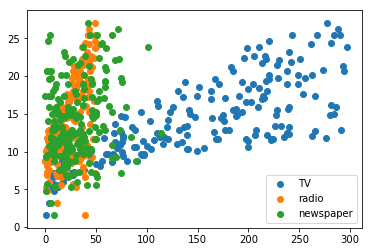

In [6]:
ax = plt.figure().add_subplot(111)
ax.scatter(df.TV, df.sales, label='TV')
ax.scatter(df.radio, df.sales, label='radio')
ax.scatter(df.newspaper, df.sales, label='newspaper')
plt.legend()
plt.show()

## 2. Prediksi Penjualan Berdasarkan Biaya Media Iklan dengan Regresi Linear (19 poin)

### Soal 2.1 (4 poin)

Kita akan membuat simple linear regression dengan satu fitur. Dalam kasus ini, mari mencoba melihat hubungan antara `sales` dengan biaya untuk media iklan di `TV`.

Ambil fitur dari kolom `TV` dan response dari kolom `sales`, kemudian buat sebuah model linear regression menggunakan pustaka scikit-learn dan latih model tersebut dengan data yang Anda miliki! Laporkan nilai bias dan koefisiennya. Lalu, jelaskan bagaimana intepretasi Anda terhadap koefisien dari model yang Anda miliki.

*Petunjuk: Lihat cara penggunaan pustakanya di [sini](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py).*

In [7]:
#regr = LinearRegression()

#x = df.TV.values.reshape(-1,1)
#regr.fit(x, df.sales)
x=df.TV
y=df.sales
regr = LinearRegression()
x_train, y_train, x_test, y_test = train_test_split (x,y)
#regr = LinearRegression()
#regr.fit (x_train.values.reshape(-1,1),x_train)
regr.fit(x.values.reshape(-1,1),y)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ 0.04753664]
Intercept: 
 7.03259354913


*Jawaban Anda di sini*

### Soal 2.2.a (3 poin)

Mari kita lihat seberapa baik garis regresi yang dibuat dari model yang Anda miliki. Buatlah prediksi dari biaya `TV` yang paling minimum dan biaya `TV` yang paling maksimum! Gambarkan scatter plot dan garis regresi model Anda atas prediksi tersebut. Bagaimana garis tersebut mencocokkan data Anda?

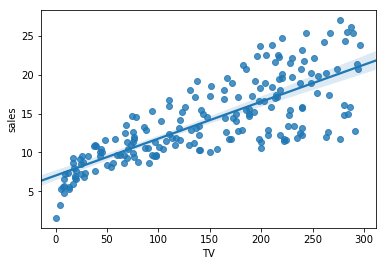

In [8]:
sns.regplot(x=df.TV, y=df.sales)

plt.xlabel('TV')
plt.ylabel('sales')

### Soal 2.2.b (3 poin)

Coba lakukan kembali regresi pada data tersebut, tetapi kali ini gunakan fungsi basis polinomial orde 3. Gambarkan kembali scatter plot dan fungsi regresinya.

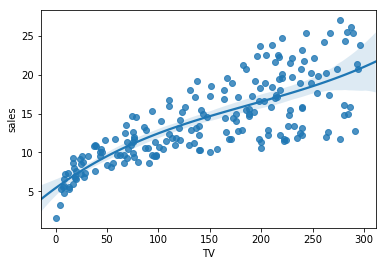

In [9]:
sns.regplot(x=df.TV, y=df.sales, order=3)
plt.xlabel('TV')
plt.ylabel('sales')

### Soal 2.2.c (3 poin)

Salah satu cara untuk memastikan bahwa model yang Anda hasilkan sudah cukup baik pada model regresi adalah dengan menghitung nilai *mean squared error* (MSE). Coba hitung nilai MSE untuk regresi dengan dan tanpa fungsi basis polinomial seperti yang Anda kerjakan pada bagian a dan b. Apa yang dapat Anda amati? Apakah nilainya sesuai dengan ekspektasi Anda?

In [10]:
y_pred1=(regr.intercept_+(x*regr.coef_))
deg3 = np.polyfit(x, y, 3)#last item int deg3 is the intercept
y_pred3= deg3[3] + (x*deg3[2]) + (x*deg3[1]) + (x*deg3[0]) 
print ("MSE order 1: ", mean_squared_error(y, y_pred1))
print ("MSE order 3: ", mean_squared_error(y, y_pred3))

MSE order 1:  10.5126529157
MSE order 3:  58.4181195642


# *Jawaban Anda di sini*

### Soal 2.3.a (4 poin)

Sekarang kita akan melakukan Multiple Linear Regression. Buatlah sebuah model dengan menggunakan Linear Regression dari scikit-learn untuk fitur `TV`, `radio`, dan `newspaper`. Variabel dependen yang digunakan adalah `sales`. Keluarkan pula nilai bias dan nilai koefisien ketiga fitur tersebut. Sebelum itu, bagi dataset menjadi data latih dan data uji dengan proporsi data uji sebanyak 20%.

In [11]:
X = df.as_matrix(['TV', 'radio', 'newspaper'])
y = df.as_matrix(['sales'])

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.8, random_state=42)

rgr = LinearRegression()
rgr.fit(X_train, y_train)

print('Coefficients: \n', rgr.coef_)
print('Intercept: \n', rgr.intercept_)

Coefficients: 
 [[ 0.04792388  0.17449572  0.03337795]]
Intercept: 
 [ 1.73010818]


### Soal 2.3.b (2 poin)

Lakukan evaluasi model *multiple linear regression* yang Anda miliki dari data uji dengan menggunakan *mean squared error*.

In [12]:
y_test_pred = rgr.intercept_ + (np.transpose(X_test)[0] * rgr.coef_[0][0]) + (np.transpose(X_test)[1] * rgr.coef_[0][1]) + (np.transpose(X_test)[2] * rgr.coef_[0][2])

print ("MSE: ", mean_squared_error(y_test, y_test_pred))

MSE:  3.33597792459


## 3. Eksplorasi Awal Data Food-101 (3 poin)

Pertama, kita akan memuat data menggunakan kode di bawah ini. `X` merupakan gambar yang telah diterjemahkan dalam bentuk *tensor* atau array multidimensi. Dimensi pertama menunjukkan jumlah datanya, dua dimensi berikutnya menunjukkan panjang dan lebar dari gambarnya, dan dimensi keempat merupakan *channels* (RGB). Di sisi lain, `y` adalah kelas dari masing-masing gambar yang diberikan dalam `X` sehingga `X.shape[0] == y.shape[0]`.

In [13]:
X = np.load('../datasets/food.npy')
y = np.load('../datasets/food_labels.npy')

X.shape

(2001, 28, 28, 3)

### Soal 3.1 (1 poin)

Berapa banyak gambar sushi dan pizza masing-masing dalam dataset ini?

In [14]:
print ("Pizza: ", np.count_nonzero(y=='pizza'))
print ("Sushi: ", np.count_nonzero(y=='sushi'))

Pizza:  1001
Sushi:  1000


### Soal 3.2 (2 poin)

Gambarkan satu contoh pizza (indeks 0-1000) dan satu contoh sushi (indeks 1001-2000) dari dataset yang digunakan.


*Petunjuk: Anda dapat menggunakan `plt.imshow()`*

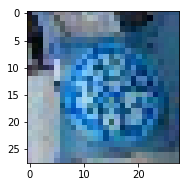

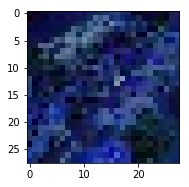

In [15]:
img = plt.figure().add_subplot(121)
plt.imshow(X[102])
img = plt.figure().add_subplot(122)
plt.imshow(X[1502])

#plt.imshow(X[102])

## 4. Klasifikasi Gambar Pizza dan Sushi Menggunakan Logistic Regression (7 poin)

### Soal 4.1 (1 poin)

Bagi dataset Anda menjadi 70-30 untuk training-test sets.

In [16]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)
X_train.shape

(1400, 28, 28, 3)

### Soal 4.2.a (4 poin)

Buat gambar yang berbentuk matriks pixel yang ada menjadi flat, lalu lakukan regresi logistik ke data yang telah Anda bagi tadi.

In [17]:
X_train.reshape(1400, 28*28*3)
logr = LogisticRegression()
logr.fit(X_train.reshape(1400, 28*28*3), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Soal 4.2.b (2 poin)

Apa pendapat Anda tentang hasil klasifikasi tersebut? Apakah hasilnya sudah cukup baik?

*Jawaban Anda di sini*

## 5. Klasifikasi Gambar Pizza dan Sushi Menggunakan Neural Networks (15 poin)

Coba klasifikasikan data Food-101 untuk kedua jenis makanan diatas dengan menggunakan pustaka dari Keras untuk *deep learning* atau *neural networks*. Jangan lupa untuk melaporkan akurasi dan *confusion matrix*-nya.

*Petunjuk: Anda mungkin perlu mengubah dimensi dari data latih dan data uji Anda menjadi $n \times d \times d \times 1$ dengan 1 dimensi terakhir adalah channel hitam-putih. Nilainya bisa menjadi 3 jika kita menggunakan channel warna RGB.*

*Anda mungkin perlu menggunakan representasi one-of-K untuk label yang digunakan. Anda dapat menggunakan `keras.utils.to_categorical` untuk melakukan hal ini. Silakan mencontoh kode untuk deep neural networks sederhana di [sini](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py) atau dengan menggunakan convolutional neural networks di [sini](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py).*

Penilaian:

1. Implementasi kode neural networks (7 poin)
2. Implementasi convolutional neural networks (5 poin)
3. Melaporkan akurasi dan membuat heatmap confusion matrix (2 poin)

### Soal 5.1 (2 poin)

Ubahlah gambar pada `X_train` dan `X_test` yang Anda gunakan menjadi hitam-putih dengan mengambil nilai rata-rata dari channel RGB. Simpan sebagai `X_train_bw` dan `X_test_bw`.

*Petunjuk: Gunakan `np.mean()`*

In [18]:
X_train_bw = []
for pic in X_train.reshape(1400, 28*28, 3):
    for pix in pic:
        X_train_bw += [np.mean(pix)]

X_train_bw = np.asarray(X_train_bw)
print (X_train_bw.shape)
X_train_bw = X_train_bw.reshape(1400, 28, 28)
print (X_train_bw.shape)

X_test_bw = []
for pic in X_test.reshape(601, 28*28, 3):
    for pix in pic:
        X_test_bw += [np.mean(pix)]

X_test_bw = np.asarray(X_test_bw)
print (X_test_bw.shape)
X_test_bw = X_test_bw.reshape(601, 28, 28)
print (X_test_bw.shape)

(1097600,)
(1400, 28, 28)
(471184,)
(601, 28, 28)


### Soal 5.2 (2 poin)

Anda akan mencoba menerapkan Neural Networks dengan model MultiLayerPerceptron (MLP). Jalankan kode di bawah ini. Apakah hasilnya lebih baik dibandingkan dengan menggunakan regresi logistik?

*Kode di bawah diadaptasi dari [sini](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py).*

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_label = le.fit_transform(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [20]:
batch_size = 64
epochs = 20

x_train = X_train.reshape(X_train.shape[0], 28 * 28 * 3)
x_test = X_test.reshape(X_test.shape[0], 28 * 28 * 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28 * 3,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1204736   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 1,467,905
Trainable params: 1,467,905
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [===========================

### Soal 5.3 (6 poin)

Adaptasi kode pada soal 5.2 untuk dapat berjalan pada data gambar hitam-putih. Apakah hasilnya jadi lebih baik atau lebih buruk? Sesuaikah ini dengan ekspektasi Anda?

In [21]:
batch_size = 64
epochs = 20

x_train_bw = X_train_bw.reshape(X_train_bw.shape[0], 28 * 28)
x_test_bw = X_test_bw.reshape(X_test.shape[0], 28 * 28)
x_train_bw = x_train_bw.astype('float32')
x_test_bw = x_test_bw.astype('float32')
x_train_bw /= 255
x_test_bw /= 255
print(x_train_bw.shape[0], 'train samples')
print(x_test_bw.shape[0], 'test samples')

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train_bw, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_bw, y_test))
score = model.evaluate(x_test_bw, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 665,089
Trainable params: 665,089
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================]

### Soal 5.4 (5 poin)

Buat variasi dari kode di atas, e.g. mengubah jumlah hidden layers, jumlah hidden units, jumlah epoch, activation function, dsb. Lalu, laporkan akurasinya.

Semakin banyak variasi Anda dan semakin baik hasilnya, semakin besar poin Anda untuk soal ini.

In [25]:
rep = []
k_batch_size = [32, 64, 128]
k_epochs = [5, 10, 15, 20]
k_hidden_layers = [1,2,3,4,5]
k_hidden_units = [128, 256, 512, 1024]

for i in k_batch_size:
    for j in k_epochs:
        for k in k_hidden_layers:
            for l in k_hidden_units:
                batch_size = i
                epochs = j

                x_train_bw = X_train_bw.reshape(X_train_bw.shape[0], 28 * 28)
                x_test_bw = X_test_bw.reshape(X_test.shape[0], 28 * 28)
                x_train_bw = x_train_bw.astype('float32')
                x_test_bw = x_test_bw.astype('float32')
                x_train_bw /= 255
                x_test_bw /= 255
                print(x_train_bw.shape[0], 'train samples')
                print(x_test_bw.shape[0], 'test samples')

                model = Sequential()
                model.add(Dense(l, activation='relu', input_shape=(28 * 28,)))
                model.add(Dropout(0.2))
                for kk in range(k):
                    model.add(Dense(l, activation='relu'))
                    model.add(Dropout(0.2))
                    
                model.add(Dense(1, activation='sigmoid'))

                model.summary()

                model.compile(loss='binary_crossentropy',
                              optimizer='rmsprop',
                              metrics=['accuracy'])

                history = model.fit(x_train_bw, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    verbose=1,
                                    validation_data=(x_test_bw, y_test))
                score = model.evaluate(x_test_bw, y_test, verbose=0)
                new_rep = [i, j, k, l, score[0], score[1]]
                rep += [new_rep]
                #print ('Batch_size: ', i)
                #print ('Epochs: ', j)
                #print('Test loss:', score[0])
                #print('Test accuracy:', score[1])
        
rep = pd.DataFrame(np.asarray(rep), columns=['Batch_size', 'Epochs', 'Hidden_layers', 'Hidden_units', 'Test_loss', 'Test_accuracy'])
rep

1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 128)               100480    
_________________________________________________________________
dropout_123 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_182 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_124 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_183 (Dense)            (None, 1)                 129       
Total params: 117,121
Trainable params: 117,121
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 601 samples
Epoch 1/5
1400/1400 [==============================] 

1400/1400 [==============================] - 1s - loss: 0.7198 - acc: 0.4857 - val_loss: 0.6959 - val_acc: 0.4875
Epoch 2/5
1400/1400 [==============================] - 0s - loss: 0.7021 - acc: 0.5079 - val_loss: 0.6941 - val_acc: 0.4842
Epoch 3/5
1400/1400 [==============================] - 0s - loss: 0.6985 - acc: 0.5271 - val_loss: 0.6908 - val_acc: 0.5025
Epoch 4/5
1400/1400 [==============================] - 0s - loss: 0.6944 - acc: 0.5307 - val_loss: 0.7129 - val_acc: 0.4892
Epoch 5/5
1400/1400 [==============================] - 0s - loss: 0.6988 - acc: 0.5107 - val_loss: 0.6902 - val_acc: 0.5524
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_197 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_134 (Dropout)        (None, 256)               0         
________________________

1400/1400 [==============================] - 1s - loss: 0.7177 - acc: 0.4907 - val_loss: 0.6929 - val_acc: 0.4925
Epoch 2/5
1400/1400 [==============================] - 0s - loss: 0.7021 - acc: 0.5000 - val_loss: 0.6939 - val_acc: 0.5075
Epoch 3/5
1400/1400 [==============================] - 0s - loss: 0.6985 - acc: 0.5071 - val_loss: 0.6931 - val_acc: 0.5092
Epoch 4/5
1400/1400 [==============================] - 0s - loss: 0.6986 - acc: 0.5043 - val_loss: 0.6929 - val_acc: 0.4925
Epoch 5/5
1400/1400 [==============================] - 0s - loss: 0.6921 - acc: 0.5250 - val_loss: 0.6910 - val_acc: 0.5374
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_214 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_147 (Dropout)        (None, 256)               0         
________________________

Train on 1400 samples, validate on 601 samples
Epoch 1/5
1400/1400 [==============================] - 1s - loss: 0.7140 - acc: 0.5179 - val_loss: 0.6955 - val_acc: 0.5108
Epoch 2/5
1400/1400 [==============================] - 0s - loss: 0.7044 - acc: 0.4807 - val_loss: 0.6922 - val_acc: 0.5441
Epoch 3/5
1400/1400 [==============================] - 0s - loss: 0.6982 - acc: 0.5043 - val_loss: 0.7027 - val_acc: 0.4892
Epoch 4/5
1400/1400 [==============================] - 0s - loss: 0.6979 - acc: 0.5000 - val_loss: 0.7019 - val_acc: 0.5108
Epoch 5/5
1400/1400 [==============================] - 0s - loss: 0.7015 - acc: 0.4986 - val_loss: 0.6921 - val_acc: 0.5441
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_235 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_164 (Dropout)        (Non

Train on 1400 samples, validate on 601 samples
Epoch 1/5
1400/1400 [==============================] - 1s - loss: 0.7084 - acc: 0.4779 - val_loss: 0.6943 - val_acc: 0.5108
Epoch 2/5
1400/1400 [==============================] - 0s - loss: 0.7001 - acc: 0.5021 - val_loss: 0.6932 - val_acc: 0.5125
Epoch 3/5
1400/1400 [==============================] - 0s - loss: 0.6981 - acc: 0.4986 - val_loss: 0.6964 - val_acc: 0.4908
Epoch 4/5
1400/1400 [==============================] - 0s - loss: 0.6990 - acc: 0.4821 - val_loss: 0.6943 - val_acc: 0.5108
Epoch 5/5
1400/1400 [==============================] - 0s - loss: 0.6953 - acc: 0.4979 - val_loss: 0.6939 - val_acc: 0.4842
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_260 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_185 (Dropout)        (Non

Train on 1400 samples, validate on 601 samples
Epoch 1/5
1400/1400 [==============================] - 6s - loss: 7.7650 - acc: 0.4964 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 2/5
1400/1400 [==============================] - 4s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 3/5
1400/1400 [==============================] - 4s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 4/5
1400/1400 [==============================] - 4s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 5/5
1400/1400 [==============================] - 4s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_281 (Dense)            (None, 128)               100480    
_________________________________________________________________
dropout_203 (Dropout)        (Non

Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 2s - loss: 1.7880 - acc: 0.5086 - val_loss: 0.7146 - val_acc: 0.5125
Epoch 2/10
1400/1400 [==============================] - 1s - loss: 0.7391 - acc: 0.5129 - val_loss: 0.7064 - val_acc: 0.4892
Epoch 3/10
1400/1400 [==============================] - 1s - loss: 0.7119 - acc: 0.5171 - val_loss: 0.6909 - val_acc: 0.5374
Epoch 4/10
1400/1400 [==============================] - 1s - loss: 0.7074 - acc: 0.5414 - val_loss: 0.6842 - val_acc: 0.5591
Epoch 5/10
1400/1400 [==============================] - 1s - loss: 0.7042 - acc: 0.5536 - val_loss: 0.7100 - val_acc: 0.5374
Epoch 6/10
1400/1400 [==============================] - 1s - loss: 0.6925 - acc: 0.5664 - val_loss: 1.2550 - val_acc: 0.4892
Epoch 7/10
1400/1400 [==============================] - 1s - loss: 0.7078 - acc: 0.5614 - val_loss: 0.6883 - val_acc: 0.5075
Epoch 8/10
1400/1400 [==============================] - 1s - loss: 0.6923 - ac

1400/1400 [==============================] - 0s - loss: 0.7129 - acc: 0.5257 - val_loss: 0.7289 - val_acc: 0.5108
Epoch 4/10
1400/1400 [==============================] - 0s - loss: 0.7027 - acc: 0.5136 - val_loss: 0.7459 - val_acc: 0.5108
Epoch 5/10
1400/1400 [==============================] - 0s - loss: 0.7063 - acc: 0.5379 - val_loss: 0.7068 - val_acc: 0.4892
Epoch 6/10
1400/1400 [==============================] - 0s - loss: 0.6909 - acc: 0.5464 - val_loss: 0.6889 - val_acc: 0.5324
Epoch 7/10
1400/1400 [==============================] - 0s - loss: 0.6883 - acc: 0.5529 - val_loss: 0.6850 - val_acc: 0.5541
Epoch 8/10
1400/1400 [==============================] - 0s - loss: 0.6793 - acc: 0.5707 - val_loss: 0.7034 - val_acc: 0.5341
Epoch 9/10
1400/1400 [==============================] - 0s - loss: 0.6737 - acc: 0.5950 - val_loss: 0.7007 - val_acc: 0.5574
Epoch 10/10
1400/1400 [==============================] - 0s - loss: 0.6800 - acc: 0.5850 - val_loss: 0.6863 - val_acc: 0.5574
1400 train

1400/1400 [==============================] - 0s - loss: 0.7071 - acc: 0.5143 - val_loss: 0.7247 - val_acc: 0.5108
Epoch 3/10
1400/1400 [==============================] - 0s - loss: 0.7052 - acc: 0.4921 - val_loss: 0.6920 - val_acc: 0.5408
Epoch 4/10
1400/1400 [==============================] - 0s - loss: 0.6990 - acc: 0.4986 - val_loss: 0.7024 - val_acc: 0.4892
Epoch 5/10
1400/1400 [==============================] - 0s - loss: 0.7030 - acc: 0.5086 - val_loss: 0.6950 - val_acc: 0.5108
Epoch 6/10
1400/1400 [==============================] - 0s - loss: 0.6972 - acc: 0.5086 - val_loss: 0.6909 - val_acc: 0.5191
Epoch 7/10
1400/1400 [==============================] - 0s - loss: 0.6971 - acc: 0.5157 - val_loss: 0.6944 - val_acc: 0.4792
Epoch 8/10
1400/1400 [==============================] - 0s - loss: 0.6941 - acc: 0.5486 - val_loss: 0.7057 - val_acc: 0.4892
Epoch 9/10
1400/1400 [==============================] - 0s - loss: 0.6908 - acc: 0.5429 - val_loss: 0.6896 - val_acc: 0.5141
Epoch 10/10

Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 1s - loss: 0.7105 - acc: 0.5229 - val_loss: 0.6928 - val_acc: 0.5324
Epoch 2/10
1400/1400 [==============================] - 0s - loss: 0.7068 - acc: 0.4814 - val_loss: 0.6935 - val_acc: 0.4892
Epoch 3/10
1400/1400 [==============================] - 0s - loss: 0.6979 - acc: 0.5057 - val_loss: 0.6983 - val_acc: 0.4892
Epoch 4/10
1400/1400 [==============================] - 0s - loss: 0.7002 - acc: 0.4943 - val_loss: 0.6969 - val_acc: 0.4892
Epoch 5/10
1400/1400 [==============================] - 0s - loss: 0.6984 - acc: 0.4864 - val_loss: 0.6939 - val_acc: 0.4875
Epoch 6/10
1400/1400 [==============================] - 0s - loss: 0.6975 - acc: 0.4957 - val_loss: 0.6931 - val_acc: 0.4892
Epoch 7/10
1400/1400 [==============================] - 0s - loss: 0.6999 - acc: 0.4743 - val_loss: 0.7011 - val_acc: 0.4892
Epoch 8/10
1400/1400 [==============================] - 0s - loss: 0.6961 - ac

Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 5s - loss: 0.9515 - acc: 0.5000 - val_loss: 0.6944 - val_acc: 0.5108
Epoch 2/10
1400/1400 [==============================] - 3s - loss: 0.7080 - acc: 0.5143 - val_loss: 0.7120 - val_acc: 0.4892
Epoch 3/10
1400/1400 [==============================] - 3s - loss: 0.7049 - acc: 0.5207 - val_loss: 0.6954 - val_acc: 0.4892
Epoch 4/10
1400/1400 [==============================] - 3s - loss: 0.7002 - acc: 0.4893 - val_loss: 0.7014 - val_acc: 0.5108
Epoch 5/10
1400/1400 [==============================] - 3s - loss: 0.6975 - acc: 0.5086 - val_loss: 0.7067 - val_acc: 0.4892
Epoch 6/10
1400/1400 [==============================] - 3s - loss: 0.6992 - acc: 0.5021 - val_loss: 0.6942 - val_acc: 0.4892
Epoch 7/10
1400/1400 [==============================] - 3s - loss: 0.6986 - acc: 0.5093 - val_loss: 0.7145 - val_acc: 0.4892
Epoch 8/10
1400/1400 [==============================] - 3s - loss: 0.6973 - ac

Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 3s - loss: 0.8113 - acc: 0.4957 - val_loss: 0.6965 - val_acc: 0.4892
Epoch 2/10
1400/1400 [==============================] - 1s - loss: 0.7010 - acc: 0.5014 - val_loss: 0.6978 - val_acc: 0.5108
Epoch 3/10
1400/1400 [==============================] - 1s - loss: 0.6979 - acc: 0.5150 - val_loss: 0.6929 - val_acc: 0.5225
Epoch 4/10
1400/1400 [==============================] - 1s - loss: 0.6971 - acc: 0.4886 - val_loss: 0.7138 - val_acc: 0.4892
Epoch 5/10
1400/1400 [==============================] - 1s - loss: 0.6971 - acc: 0.4800 - val_loss: 0.6928 - val_acc: 0.5158
Epoch 6/10
1400/1400 [==============================] - 1s - loss: 0.6972 - acc: 0.4700 - val_loss: 0.6929 - val_acc: 0.5108
Epoch 7/10
1400/1400 [==============================] - 1s - loss: 0.6972 - acc: 0.4900 - val_loss: 0.6933 - val_acc: 0.4892
Epoch 8/10
1400/1400 [==============================] - 1s - loss: 0.6947 - ac

Train on 1400 samples, validate on 601 samples
Epoch 1/15
1400/1400 [==============================] - 2s - loss: 0.7990 - acc: 0.4714 - val_loss: 0.6916 - val_acc: 0.5141
Epoch 2/15
1400/1400 [==============================] - 0s - loss: 0.7125 - acc: 0.5171 - val_loss: 0.7066 - val_acc: 0.4809
Epoch 3/15
1400/1400 [==============================] - 0s - loss: 0.7035 - acc: 0.5357 - val_loss: 0.7032 - val_acc: 0.4892
Epoch 4/15
1400/1400 [==============================] - 0s - loss: 0.7013 - acc: 0.5286 - val_loss: 0.6907 - val_acc: 0.4892
Epoch 5/15
1400/1400 [==============================] - 0s - loss: 0.6986 - acc: 0.5607 - val_loss: 0.6977 - val_acc: 0.4975
Epoch 6/15
1400/1400 [==============================] - 0s - loss: 0.6912 - acc: 0.5436 - val_loss: 0.6845 - val_acc: 0.5541
Epoch 7/15
1400/1400 [==============================] - ETA: 0s - loss: 0.6734 - acc: 0.591 - 0s - loss: 0.6718 - acc: 0.5936 - val_loss: 0.7092 - val_acc: 0.5158
Epoch 8/15
1400/1400 [==================

Train on 1400 samples, validate on 601 samples
Epoch 1/15
1400/1400 [==============================] - 2s - loss: 0.7271 - acc: 0.4993 - val_loss: 0.6994 - val_acc: 0.5075
Epoch 2/15
1400/1400 [==============================] - 0s - loss: 0.7078 - acc: 0.4907 - val_loss: 0.6920 - val_acc: 0.5308
Epoch 3/15
1400/1400 [==============================] - 0s - loss: 0.7067 - acc: 0.4779 - val_loss: 0.6928 - val_acc: 0.4925
Epoch 4/15
1400/1400 [==============================] - 0s - loss: 0.6998 - acc: 0.5157 - val_loss: 0.6917 - val_acc: 0.5141
Epoch 5/15
1400/1400 [==============================] - 0s - loss: 0.6976 - acc: 0.5057 - val_loss: 0.6943 - val_acc: 0.4875
Epoch 6/15
1400/1400 [==============================] - 0s - loss: 0.6974 - acc: 0.5071 - val_loss: 0.6926 - val_acc: 0.5374
Epoch 7/15
1400/1400 [==============================] - 0s - loss: 0.6945 - acc: 0.5400 - val_loss: 0.6875 - val_acc: 0.5574
Epoch 8/15
1400/1400 [==============================] - 0s - loss: 0.6919 - ac

1400/1400 [==============================] - 0s - loss: 0.6294 - acc: 0.6457 - val_loss: 0.6842 - val_acc: 0.5790
Epoch 15/15
1400/1400 [==============================] - 0s - loss: 0.6425 - acc: 0.6371 - val_loss: 0.6910 - val_acc: 0.5175
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_405 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dropout_300 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_406 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_301 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_407 (Dense)            (None, 1024)              1049600  

Train on 1400 samples, validate on 601 samples
Epoch 1/15
1400/1400 [==============================] - 2s - loss: 0.7323 - acc: 0.5086 - val_loss: 0.6919 - val_acc: 0.5391
Epoch 2/15
1400/1400 [==============================] - 0s - loss: 0.7016 - acc: 0.4850 - val_loss: 0.7323 - val_acc: 0.4892
Epoch 3/15
1400/1400 [==============================] - 0s - loss: 0.7028 - acc: 0.4957 - val_loss: 0.6930 - val_acc: 0.4892
Epoch 4/15
1400/1400 [==============================] - 0s - loss: 0.7001 - acc: 0.5000 - val_loss: 0.6970 - val_acc: 0.4892
Epoch 5/15
1400/1400 [==============================] - 0s - loss: 0.7003 - acc: 0.5257 - val_loss: 0.6940 - val_acc: 0.5125
Epoch 6/15
1400/1400 [==============================] - 0s - loss: 0.6969 - acc: 0.5207 - val_loss: 0.6957 - val_acc: 0.4892
Epoch 7/15
1400/1400 [==============================] - 0s - loss: 0.6909 - acc: 0.5400 - val_loss: 0.6907 - val_acc: 0.5408
Epoch 8/15
1400/1400 [==============================] - 0s - loss: 0.6865 - ac

1400/1400 [==============================] - 3s - loss: 0.6776 - acc: 0.5893 - val_loss: 0.6895 - val_acc: 0.5624
Epoch 11/15
1400/1400 [==============================] - 3s - loss: 0.6756 - acc: 0.5929 - val_loss: 0.6836 - val_acc: 0.5607
Epoch 12/15
1400/1400 [==============================] - 3s - loss: 0.6793 - acc: 0.5850 - val_loss: 0.6836 - val_acc: 0.5707
Epoch 13/15
1400/1400 [==============================] - 3s - loss: 0.6923 - acc: 0.6457 - val_loss: 0.7093 - val_acc: 0.5574
Epoch 14/15
1400/1400 [==============================] - 3s - loss: 0.6256 - acc: 0.6493 - val_loss: 0.7515 - val_acc: 0.5607
Epoch 15/15
1400/1400 [==============================] - 3s - loss: 0.6441 - acc: 0.6550 - val_loss: 0.6948 - val_acc: 0.5557
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_429 (Dense)            (None, 128)               100480    
______________________

1400/1400 [==============================] - 0s - loss: 0.6443 - acc: 0.6436 - val_loss: 0.6750 - val_acc: 0.5857
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_441 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_329 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_442 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_330 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_443 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_331 (Dropout)        (None, 512)               0  

1400/1400 [==============================] - 2s - loss: 0.7062 - acc: 0.4857 - val_loss: 0.6939 - val_acc: 0.4892
Epoch 2/15
1400/1400 [==============================] - 0s - loss: 0.7008 - acc: 0.4900 - val_loss: 0.6920 - val_acc: 0.5092
Epoch 3/15
1400/1400 [==============================] - 0s - loss: 0.6988 - acc: 0.5093 - val_loss: 0.6924 - val_acc: 0.5424
Epoch 4/15
1400/1400 [==============================] - 0s - loss: 0.6990 - acc: 0.5079 - val_loss: 0.6936 - val_acc: 0.5108
Epoch 5/15
1400/1400 [==============================] - 0s - loss: 0.6971 - acc: 0.4836 - val_loss: 0.6934 - val_acc: 0.4742
Epoch 6/15
1400/1400 [==============================] - 0s - loss: 0.6973 - acc: 0.4950 - val_loss: 0.6928 - val_acc: 0.4975
Epoch 7/15
1400/1400 [==============================] - 0s - loss: 0.6948 - acc: 0.5136 - val_loss: 0.6925 - val_acc: 0.5275
Epoch 8/15
1400/1400 [==============================] - 0s - loss: 0.6948 - acc: 0.5079 - val_loss: 0.6924 - val_acc: 0.5175
Epoch 9/15


1400/1400 [==============================] - 1s - loss: 0.7053 - acc: 0.4986 - val_loss: 0.6929 - val_acc: 0.5108
Epoch 3/15
1400/1400 [==============================] - 1s - loss: 0.6994 - acc: 0.4936 - val_loss: 0.6927 - val_acc: 0.5108
Epoch 4/15
1400/1400 [==============================] - 1s - loss: 0.6977 - acc: 0.5000 - val_loss: 0.6943 - val_acc: 0.4892
Epoch 5/15
1400/1400 [==============================] - 1s - loss: 0.6972 - acc: 0.4757 - val_loss: 0.6928 - val_acc: 0.5441
Epoch 6/15
1400/1400 [==============================] - 1s - loss: 0.6969 - acc: 0.5093 - val_loss: 0.6930 - val_acc: 0.5225
Epoch 7/15
1400/1400 [==============================] - 1s - loss: 0.6950 - acc: 0.5057 - val_loss: 0.6926 - val_acc: 0.5408
Epoch 8/15
1400/1400 [==============================] - 1s - loss: 0.6973 - acc: 0.5100 - val_loss: 0.6924 - val_acc: 0.4892
Epoch 9/15
1400/1400 [==============================] - 1s - loss: 0.6926 - acc: 0.5479 - val_loss: 0.6889 - val_acc: 0.5491
Epoch 10/15

1400/1400 [==============================] - 0s - loss: 0.6164 - acc: 0.6721 - val_loss: 0.6802 - val_acc: 0.5790
Epoch 12/20
1400/1400 [==============================] - 0s - loss: 0.6022 - acc: 0.6657 - val_loss: 0.7109 - val_acc: 0.5641
Epoch 13/20
1400/1400 [==============================] - 0s - loss: 0.5981 - acc: 0.6786 - val_loss: 1.0025 - val_acc: 0.4892
Epoch 14/20
1400/1400 [==============================] - 0s - loss: 0.5960 - acc: 0.6857 - val_loss: 0.9135 - val_acc: 0.4958
Epoch 15/20
1400/1400 [==============================] - 0s - loss: 0.5690 - acc: 0.7050 - val_loss: 0.7021 - val_acc: 0.5807
Epoch 16/20
1400/1400 [==============================] - 0s - loss: 0.5496 - acc: 0.7129 - val_loss: 0.7139 - val_acc: 0.5724
Epoch 17/20
1400/1400 [==============================] - 0s - loss: 0.5428 - acc: 0.7307 - val_loss: 0.7309 - val_acc: 0.5874
Epoch 18/20
1400/1400 [==============================] - 0s - loss: 0.5344 - acc: 0.7279 - val_loss: 0.8426 - val_acc: 0.5258
Epoc

1400/1400 [==============================] - 0s - loss: 0.5896 - acc: 0.7036 - val_loss: 0.6924 - val_acc: 0.6123
Epoch 20/20
1400/1400 [==============================] - 0s - loss: 0.5487 - acc: 0.7136 - val_loss: 0.6813 - val_acc: 0.6206
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_490 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dropout_369 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_491 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_370 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_492 (Dense)            (None, 1)                 1025     

Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 2s - loss: 0.7540 - acc: 0.4993 - val_loss: 0.6894 - val_acc: 0.5358
Epoch 2/20
1400/1400 [==============================] - 0s - loss: 0.7083 - acc: 0.5136 - val_loss: 0.7334 - val_acc: 0.4892
Epoch 3/20
1400/1400 [==============================] - 0s - loss: 0.7108 - acc: 0.5171 - val_loss: 0.7097 - val_acc: 0.4892
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.7002 - acc: 0.5107 - val_loss: 0.7213 - val_acc: 0.4892
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.7016 - acc: 0.5200 - val_loss: 0.6928 - val_acc: 0.5241
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.6948 - acc: 0.5629 - val_loss: 0.7081 - val_acc: 0.4958
Epoch 7/20
1400/1400 [==============================] - 0s - loss: 0.6799 - acc: 0.5643 - val_loss: 0.7242 - val_acc: 0.4908
Epoch 8/20
1400/1400 [==============================] - 0s - loss: 0.6823 - ac

1400/1400 [==============================] - 2s - loss: 0.7012 - acc: 0.5079 - val_loss: 0.6961 - val_acc: 0.5141
Epoch 5/20
1400/1400 [==============================] - 2s - loss: 0.6938 - acc: 0.5057 - val_loss: 0.6896 - val_acc: 0.5324
Epoch 6/20
1400/1400 [==============================] - 2s - loss: 0.6933 - acc: 0.5379 - val_loss: 0.6893 - val_acc: 0.5907
Epoch 7/20
1400/1400 [==============================] - 2s - loss: 0.6884 - acc: 0.5614 - val_loss: 0.6863 - val_acc: 0.5541
Epoch 8/20
1400/1400 [==============================] - 2s - loss: 0.6797 - acc: 0.5714 - val_loss: 0.6837 - val_acc: 0.5707
Epoch 9/20
1400/1400 [==============================] - 2s - loss: 0.6957 - acc: 0.5736 - val_loss: 0.6899 - val_acc: 0.5258
Epoch 10/20
1400/1400 [==============================] - 2s - loss: 0.6744 - acc: 0.5871 - val_loss: 0.6935 - val_acc: 0.5291
Epoch 11/20
1400/1400 [==============================] - 2s - loss: 0.6655 - acc: 0.6043 - val_loss: 0.6935 - val_acc: 0.5458
Epoch 12/

1400/1400 [==============================] - 0s - loss: 0.7010 - acc: 0.5121 - val_loss: 0.6940 - val_acc: 0.5108
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.6969 - acc: 0.5121 - val_loss: 0.7223 - val_acc: 0.5108
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.6994 - acc: 0.5243 - val_loss: 0.6938 - val_acc: 0.5175
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.6963 - acc: 0.5179 - val_loss: 0.6927 - val_acc: 0.5275
Epoch 7/20
1400/1400 [==============================] - 0s - loss: 0.6911 - acc: 0.5536 - val_loss: 0.6929 - val_acc: 0.5275
Epoch 8/20
1400/1400 [==============================] - 0s - loss: 0.6848 - acc: 0.5607 - val_loss: 0.6870 - val_acc: 0.5657
Epoch 9/20
1400/1400 [==============================] - 0s - loss: 0.6762 - acc: 0.5757 - val_loss: 0.6873 - val_acc: 0.4992
Epoch 10/20
1400/1400 [==============================] - 0s - loss: 0.6668 - acc: 0.5914 - val_loss: 0.9493 - val_acc: 0.4892
Epoch 11/2

1400/1400 [==============================] - 2s - loss: 0.7272 - acc: 0.5036 - val_loss: 0.6928 - val_acc: 0.5108
Epoch 3/20
1400/1400 [==============================] - 2s - loss: 0.6975 - acc: 0.5314 - val_loss: 0.7039 - val_acc: 0.5108
Epoch 4/20
1400/1400 [==============================] - 2s - loss: 0.7004 - acc: 0.4986 - val_loss: 0.6933 - val_acc: 0.5108
Epoch 5/20
1400/1400 [==============================] - 2s - loss: 0.6995 - acc: 0.4971 - val_loss: 0.7040 - val_acc: 0.5108
Epoch 6/20
1400/1400 [==============================] - 2s - loss: 0.6985 - acc: 0.5214 - val_loss: 0.6945 - val_acc: 0.4892
Epoch 7/20
1400/1400 [==============================] - 2s - loss: 0.6937 - acc: 0.5514 - val_loss: 0.6893 - val_acc: 0.5042
Epoch 8/20
1400/1400 [==============================] - 2s - loss: 0.6839 - acc: 0.5686 - val_loss: 0.6949 - val_acc: 0.5291
Epoch 9/20
1400/1400 [==============================] - 3s - loss: 0.6920 - acc: 0.5457 - val_loss: 0.6852 - val_acc: 0.5424
Epoch 10/20

Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 3s - loss: 0.7187 - acc: 0.4957 - val_loss: 0.6926 - val_acc: 0.4942
Epoch 2/20
1400/1400 [==============================] - 0s - loss: 0.7036 - acc: 0.4993 - val_loss: 0.6953 - val_acc: 0.4892
Epoch 3/20
1400/1400 [==============================] - 0s - loss: 0.7017 - acc: 0.4836 - val_loss: 0.6929 - val_acc: 0.5108
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.6979 - acc: 0.5107 - val_loss: 0.6961 - val_acc: 0.4892
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.6971 - acc: 0.4979 - val_loss: 0.6915 - val_acc: 0.5391
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.6984 - acc: 0.5121 - val_loss: 0.6961 - val_acc: 0.4892
Epoch 7/20
1400/1400 [==============================] - 0s - loss: 0.6945 - acc: 0.5286 - val_loss: 0.6864 - val_acc: 0.5441
Epoch 8/20
1400/1400 [==============================] - 0s - loss: 0.6930 - ac

Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 6s - loss: 7.8925 - acc: 0.4986 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 2/20
1400/1400 [==============================] - 3s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 3/20
1400/1400 [==============================] - 3s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 4/20
1400/1400 [==============================] - 3s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 5/20
1400/1400 [==============================] - 3s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 6/20
1400/1400 [==============================] - 3s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 7/20
1400/1400 [==============================] - 3s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_

Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 3s - loss: 0.7097 - acc: 0.4936 - val_loss: 0.7377 - val_acc: 0.5108
Epoch 2/20
1400/1400 [==============================] - 0s - loss: 0.7004 - acc: 0.5043 - val_loss: 0.7000 - val_acc: 0.5108
Epoch 3/20
1400/1400 [==============================] - 0s - loss: 0.6990 - acc: 0.4979 - val_loss: 0.6927 - val_acc: 0.5108
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.6968 - acc: 0.4829 - val_loss: 0.6939 - val_acc: 0.4892
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.6962 - acc: 0.4936 - val_loss: 0.6926 - val_acc: 0.5524
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.6946 - acc: 0.5036 - val_loss: 0.6930 - val_acc: 0.5108
Epoch 7/20
1400/1400 [==============================] - 0s - loss: 0.6958 - acc: 0.4843 - val_loss: 0.6933 - val_acc: 0.5208
Epoch 8/20
1400/1400 [==============================] - 0s - loss: 0.6955 - ac

Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 7s - loss: 1.0096 - acc: 0.4836 - val_loss: 0.6944 - val_acc: 0.4892
Epoch 2/20
1400/1400 [==============================] - 4s - loss: 0.7017 - acc: 0.4929 - val_loss: 0.6943 - val_acc: 0.5108
Epoch 3/20
1400/1400 [==============================] - 4s - loss: 0.7209 - acc: 0.5150 - val_loss: 0.6942 - val_acc: 0.4892
Epoch 4/20
1400/1400 [==============================] - 4s - loss: 0.6996 - acc: 0.5014 - val_loss: 0.6939 - val_acc: 0.4892
Epoch 5/20
1400/1400 [==============================] - 4s - loss: 0.6949 - acc: 0.4807 - val_loss: 0.6929 - val_acc: 0.5125
Epoch 6/20
1400/1400 [==============================] - 4s - loss: 0.6953 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5208
Epoch 7/20
1400/1400 [==============================] - 4s - loss: 0.7025 - acc: 0.4979 - val_loss: 0.6934 - val_acc: 0.4892
Epoch 8/20
1400/1400 [==============================] - 4s - loss: 0.6944 - ac

Train on 1400 samples, validate on 601 samples
Epoch 1/5
1400/1400 [==============================] - 3s - loss: 1.4973 - acc: 0.5329 - val_loss: 0.7998 - val_acc: 0.5108
Epoch 2/5
1400/1400 [==============================] - 0s - loss: 0.7243 - acc: 0.4814 - val_loss: 0.6908 - val_acc: 0.5458
Epoch 3/5
1400/1400 [==============================] - 0s - loss: 0.7013 - acc: 0.5200 - val_loss: 0.6958 - val_acc: 0.5125
Epoch 4/5
1400/1400 [==============================] - 0s - loss: 0.7061 - acc: 0.5429 - val_loss: 0.6946 - val_acc: 0.4875
Epoch 5/5
1400/1400 [==============================] - 0s - loss: 0.6948 - acc: 0.5457 - val_loss: 0.8402 - val_acc: 0.4892
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_593 (Dense)            (None, 128)               100480    
_________________________________________________________________
dropout_451 (Dropout)        (Non

1400/1400 [==============================] - 1s - loss: 0.6992 - acc: 0.5314 - val_loss: 0.6921 - val_acc: 0.4908
Epoch 4/5
1400/1400 [==============================] - 1s - loss: 0.7173 - acc: 0.5329 - val_loss: 0.6930 - val_acc: 0.4942
Epoch 5/5
1400/1400 [==============================] - 1s - loss: 0.7170 - acc: 0.5350 - val_loss: 0.7036 - val_acc: 0.4892
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_609 (Dense)            (None, 128)               100480    
_________________________________________________________________
dropout_463 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_610 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_464 (Dropout)        (None, 128)               0         
________

Train on 1400 samples, validate on 601 samples
Epoch 1/5
1400/1400 [==============================] - 4s - loss: 2.3569 - acc: 0.4843 - val_loss: 0.6945 - val_acc: 0.5108
Epoch 2/5
1400/1400 [==============================] - 1s - loss: 0.7016 - acc: 0.5021 - val_loss: 0.6921 - val_acc: 0.5158
Epoch 3/5
1400/1400 [==============================] - 1s - loss: 0.7111 - acc: 0.5221 - val_loss: 0.7204 - val_acc: 0.5108
Epoch 4/5
1400/1400 [==============================] - 1s - loss: 0.7007 - acc: 0.5200 - val_loss: 0.6918 - val_acc: 0.5424
Epoch 5/5
1400/1400 [==============================] - 1s - loss: 0.6990 - acc: 0.5164 - val_loss: 0.7421 - val_acc: 0.4892
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_629 (Dense)            (None, 128)               100480    
_________________________________________________________________
dropout_479 (Dropout)        (Non

dropout_496 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_650 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_497 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_651 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_498 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_652 (Dense)            (None, 1)                 1025      
Total params: 5,003,265
Trainable params: 5,003,265
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 601 samples
Epoch 1/5
1400/1400 [==============================] - 5s - loss: 1.2848 - acc: 0.507

Train on 1400 samples, validate on 601 samples
Epoch 1/5
1400/1400 [==============================] - 4s - loss: 1.0619 - acc: 0.4750 - val_loss: 0.6940 - val_acc: 0.4892
Epoch 2/5
1400/1400 [==============================] - 1s - loss: 0.7000 - acc: 0.4921 - val_loss: 0.6926 - val_acc: 0.5108
Epoch 3/5
1400/1400 [==============================] - 1s - loss: 0.7006 - acc: 0.5414 - val_loss: 0.6928 - val_acc: 0.4892
Epoch 4/5
1400/1400 [==============================] - 1s - loss: 0.6997 - acc: 0.5007 - val_loss: 0.6959 - val_acc: 0.4892
Epoch 5/5
1400/1400 [==============================] - 1s - loss: 0.6978 - acc: 0.5000 - val_loss: 0.6951 - val_acc: 0.4892
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_674 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dropout_517 (Dropout)        (Non

dense_687 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_527 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_688 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_528 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_689 (Dense)            (None, 1)                 513       
Total params: 665,089
Trainable params: 665,089
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 3s - loss: 0.9689 - acc: 0.5200 - val_loss: 0.7096 - val_acc: 0.5075
Epoch 2/10
1400/1400 [==============================] - 0s - loss: 0.7213 - acc: 0.5214 - val_lo

Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 3s - loss: 0.8168 - acc: 0.4757 - val_loss: 0.6896 - val_acc: 0.5358
Epoch 2/10
1400/1400 [==============================] - 0s - loss: 0.7100 - acc: 0.5236 - val_loss: 0.7054 - val_acc: 0.4892
Epoch 3/10
1400/1400 [==============================] - 0s - loss: 0.7038 - acc: 0.5236 - val_loss: 0.6924 - val_acc: 0.4859
Epoch 4/10
1400/1400 [==============================] - 0s - loss: 0.6991 - acc: 0.5107 - val_loss: 0.7326 - val_acc: 0.5108
Epoch 5/10
1400/1400 [==============================] - 0s - loss: 0.7018 - acc: 0.5343 - val_loss: 0.6889 - val_acc: 0.5441
Epoch 6/10
1400/1400 [==============================] - 0s - loss: 0.6952 - acc: 0.5429 - val_loss: 0.6874 - val_acc: 0.5391
Epoch 7/10
1400/1400 [==============================] - 0s - loss: 0.7000 - acc: 0.5386 - val_loss: 0.6842 - val_acc: 0.5691
Epoch 8/10
1400/1400 [==============================] - 0s - loss: 0.6896 - ac

1400/1400 [==============================] - 3s - loss: 0.7180 - acc: 0.5007 - val_loss: 0.7575 - val_acc: 0.4892
Epoch 2/10
1400/1400 [==============================] - 0s - loss: 0.7107 - acc: 0.4886 - val_loss: 0.6956 - val_acc: 0.4892
Epoch 3/10
1400/1400 [==============================] - 0s - loss: 0.6968 - acc: 0.5064 - val_loss: 0.6915 - val_acc: 0.5258
Epoch 4/10
1400/1400 [==============================] - 0s - loss: 0.6937 - acc: 0.5164 - val_loss: 0.6981 - val_acc: 0.4908
Epoch 5/10
1400/1400 [==============================] - 0s - loss: 0.6968 - acc: 0.5086 - val_loss: 0.6957 - val_acc: 0.4892
Epoch 6/10
1400/1400 [==============================] - 0s - loss: 0.6951 - acc: 0.5200 - val_loss: 0.6922 - val_acc: 0.4992
Epoch 7/10
1400/1400 [==============================] - 0s - loss: 0.6974 - acc: 0.5136 - val_loss: 0.6919 - val_acc: 0.5308
Epoch 8/10
1400/1400 [==============================] - 0s - loss: 0.6925 - acc: 0.5300 - val_loss: 0.6906 - val_acc: 0.5374
Epoch 9/10


Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 5s - loss: 2.4438 - acc: 0.5193 - val_loss: 0.6924 - val_acc: 0.4908
Epoch 2/10
1400/1400 [==============================] - 1s - loss: 0.7035 - acc: 0.5107 - val_loss: 0.6933 - val_acc: 0.4892
Epoch 3/10
1400/1400 [==============================] - 1s - loss: 0.6966 - acc: 0.5179 - val_loss: 0.7453 - val_acc: 0.4892
Epoch 4/10
1400/1400 [==============================] - 1s - loss: 0.7098 - acc: 0.5014 - val_loss: 0.7106 - val_acc: 0.4892
Epoch 5/10
1400/1400 [==============================] - 1s - loss: 0.6940 - acc: 0.5321 - val_loss: 0.7087 - val_acc: 0.4892
Epoch 6/10
1400/1400 [==============================] - 1s - loss: 0.7061 - acc: 0.4850 - val_loss: 0.6986 - val_acc: 0.5108
Epoch 7/10
1400/1400 [==============================] - 1s - loss: 0.7409 - acc: 0.5243 - val_loss: 0.6940 - val_acc: 0.4892
Epoch 8/10
1400/1400 [==============================] - 1s - loss: 0.6929 - ac

_________________________________________________________________
dense_743 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_571 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_744 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_572 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_745 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_573 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_746 (Dense)            (None, 1)                 513       
Total params: 1,453,057
Trainable params: 1,453,057
Non-trainable params: 0


1400/1400 [==============================] - 0s - loss: 0.6965 - acc: 0.5050 - val_loss: 0.6933 - val_acc: 0.5075
Epoch 6/10
1400/1400 [==============================] - 0s - loss: 0.6957 - acc: 0.5214 - val_loss: 0.6921 - val_acc: 0.5541
Epoch 7/10
1400/1400 [==============================] - 0s - loss: 0.6950 - acc: 0.5279 - val_loss: 0.6990 - val_acc: 0.5108
Epoch 8/10
1400/1400 [==============================] - 0s - loss: 0.6961 - acc: 0.5143 - val_loss: 0.6931 - val_acc: 0.4759
Epoch 9/10
1400/1400 [==============================] - 0s - loss: 0.6954 - acc: 0.5064 - val_loss: 0.6928 - val_acc: 0.5141
Epoch 10/10
1400/1400 [==============================] - 0s - loss: 0.6956 - acc: 0.4964 - val_loss: 0.6932 - val_acc: 0.4809
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_760 (Dense)            (None, 256)               200960    
__________________________

Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 6s - loss: 1.7441 - acc: 0.4871 - val_loss: 0.6930 - val_acc: 0.5108
Epoch 2/10
1400/1400 [==============================] - 2s - loss: 0.6973 - acc: 0.4886 - val_loss: 0.6930 - val_acc: 0.5108
Epoch 3/10
1400/1400 [==============================] - 2s - loss: 0.6986 - acc: 0.5043 - val_loss: 0.6927 - val_acc: 0.5108
Epoch 4/10
1400/1400 [==============================] - 2s - loss: 0.6958 - acc: 0.5021 - val_loss: 0.6933 - val_acc: 0.5108
Epoch 5/10
1400/1400 [==============================] - 2s - loss: 0.6982 - acc: 0.4943 - val_loss: 0.6936 - val_acc: 0.4892
Epoch 6/10
1400/1400 [==============================] - 2s - loss: 0.6959 - acc: 0.4936 - val_loss: 0.6939 - val_acc: 0.4892
Epoch 7/10
1400/1400 [==============================] - 2s - loss: 0.7138 - acc: 0.5121 - val_loss: 0.6927 - val_acc: 0.5108
Epoch 8/10
1400/1400 [==============================] - 2s - loss: 0.6971 - ac

Train on 1400 samples, validate on 601 samples
Epoch 1/15
1400/1400 [==============================] - 4s - loss: 1.1114 - acc: 0.5064 - val_loss: 0.7420 - val_acc: 0.4892
Epoch 2/15
1400/1400 [==============================] - 0s - loss: 0.7216 - acc: 0.5007 - val_loss: 0.6975 - val_acc: 0.4775
Epoch 3/15
1400/1400 [==============================] - 0s - loss: 0.7220 - acc: 0.5093 - val_loss: 0.6881 - val_acc: 0.5624
Epoch 4/15
1400/1400 [==============================] - 0s - loss: 0.7144 - acc: 0.5400 - val_loss: 0.7120 - val_acc: 0.4892
Epoch 5/15
1400/1400 [==============================] - 0s - loss: 0.6998 - acc: 0.5464 - val_loss: 0.6814 - val_acc: 0.5574
Epoch 6/15
1400/1400 [==============================] - 0s - loss: 0.7010 - acc: 0.5271 - val_loss: 0.6779 - val_acc: 0.5940
Epoch 7/15
1400/1400 [==============================] - 0s - loss: 0.6966 - acc: 0.5614 - val_loss: 0.6885 - val_acc: 0.5358
Epoch 8/15
1400/1400 [==============================] - 0s - loss: 0.6804 - ac

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_797 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_614 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_798 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_615 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_799 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_616 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_800 (Dense)            (None, 1)                 257       
Total para

1400/1400 [==============================] - 1s - loss: 0.7056 - acc: 0.4950 - val_loss: 0.6943 - val_acc: 0.5108
Epoch 5/15
1400/1400 [==============================] - 1s - loss: 0.7030 - acc: 0.5129 - val_loss: 0.6920 - val_acc: 0.5458
Epoch 6/15
1400/1400 [==============================] - 1s - loss: 0.6979 - acc: 0.5329 - val_loss: 0.6920 - val_acc: 0.5424
Epoch 7/15
1400/1400 [==============================] - 1s - loss: 0.7041 - acc: 0.5064 - val_loss: 0.6897 - val_acc: 0.5557
Epoch 8/15
1400/1400 [==============================] - 1s - loss: 0.6928 - acc: 0.5493 - val_loss: 0.6930 - val_acc: 0.4892
Epoch 9/15
1400/1400 [==============================] - 1s - loss: 0.7187 - acc: 0.5314 - val_loss: 0.6920 - val_acc: 0.5258
Epoch 10/15
1400/1400 [==============================] - 1s - loss: 0.6938 - acc: 0.5307 - val_loss: 0.6852 - val_acc: 0.5341
Epoch 11/15
1400/1400 [==============================] - 1s - loss: 0.6988 - acc: 0.5543 - val_loss: 0.7240 - val_acc: 0.4892
Epoch 12/

1400/1400 [==============================] - 0s - loss: 0.6650 - acc: 0.6086 - val_loss: 0.6861 - val_acc: 0.5591
Epoch 14/15
1400/1400 [==============================] - 0s - loss: 0.6559 - acc: 0.6014 - val_loss: 0.6787 - val_acc: 0.5874
Epoch 15/15
1400/1400 [==============================] - 0s - loss: 0.6521 - acc: 0.6436 - val_loss: 0.6981 - val_acc: 0.5291
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_819 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_631 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_820 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_632 (Dropout)        (None, 512)               0         
____

dropout_641 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_832 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_642 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_833 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_643 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_834 (Dense)            (None, 1)                 129       
Total params: 166,657
Trainable params: 166,657
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 601 samples
Epoch 1/15
1400/1400 [==============================] - 4s - loss: 0.7070 - acc: 0.5007 -

Train on 1400 samples, validate on 601 samples
Epoch 1/15
1400/1400 [==============================] - 5s - loss: 0.9967 - acc: 0.4921 - val_loss: 0.6936 - val_acc: 0.5008
Epoch 2/15
1400/1400 [==============================] - 1s - loss: 0.6982 - acc: 0.5293 - val_loss: 0.6954 - val_acc: 0.5108
Epoch 3/15
1400/1400 [==============================] - 1s - loss: 0.6993 - acc: 0.5186 - val_loss: 0.6915 - val_acc: 0.5141
Epoch 4/15
1400/1400 [==============================] - 1s - loss: 0.7016 - acc: 0.5043 - val_loss: 0.6927 - val_acc: 0.4942
Epoch 5/15
1400/1400 [==============================] - 1s - loss: 0.6947 - acc: 0.5350 - val_loss: 0.6907 - val_acc: 0.4925
Epoch 6/15
1400/1400 [==============================] - 1s - loss: 0.6965 - acc: 0.5336 - val_loss: 0.6924 - val_acc: 0.4942
Epoch 7/15
1400/1400 [==============================] - 1s - loss: 0.6931 - acc: 0.5264 - val_loss: 0.6972 - val_acc: 0.5158
Epoch 8/15
1400/1400 [==============================] - 1s - loss: 0.6931 - ac

1400/1400 [==============================] - 0s - loss: 0.6959 - acc: 0.5029 - val_loss: 0.6926 - val_acc: 0.5324
Epoch 4/15
1400/1400 [==============================] - 0s - loss: 0.6957 - acc: 0.5021 - val_loss: 0.6975 - val_acc: 0.4892
Epoch 5/15
1400/1400 [==============================] - 0s - loss: 0.6988 - acc: 0.4764 - val_loss: 0.6932 - val_acc: 0.4875
Epoch 6/15
1400/1400 [==============================] - 0s - loss: 0.6931 - acc: 0.5157 - val_loss: 0.6996 - val_acc: 0.4892
Epoch 7/15
1400/1400 [==============================] - 0s - loss: 0.6963 - acc: 0.4900 - val_loss: 0.6935 - val_acc: 0.4892
Epoch 8/15
1400/1400 [==============================] - 0s - loss: 0.6954 - acc: 0.4914 - val_loss: 0.6929 - val_acc: 0.5241
Epoch 9/15
1400/1400 [==============================] - 0s - loss: 0.6967 - acc: 0.4800 - val_loss: 0.6923 - val_acc: 0.5108
Epoch 10/15
1400/1400 [==============================] - 0s - loss: 0.6942 - acc: 0.5157 - val_loss: 0.6931 - val_acc: 0.4892
Epoch 11/1

1400/1400 [==============================] - 1s - loss: 0.6974 - acc: 0.5000 - val_loss: 0.6930 - val_acc: 0.4859
Epoch 5/15
1400/1400 [==============================] - 1s - loss: 0.7058 - acc: 0.5150 - val_loss: 0.6972 - val_acc: 0.5108
Epoch 6/15
1400/1400 [==============================] - 1s - loss: 0.7015 - acc: 0.5171 - val_loss: 0.6934 - val_acc: 0.4809
Epoch 7/15
1400/1400 [==============================] - 1s - loss: 0.6954 - acc: 0.4986 - val_loss: 0.6957 - val_acc: 0.5108
Epoch 8/15
1400/1400 [==============================] - 1s - loss: 0.6996 - acc: 0.5271 - val_loss: 0.6935 - val_acc: 0.5108
Epoch 9/15
1400/1400 [==============================] - 1s - loss: 0.6951 - acc: 0.5021 - val_loss: 0.7013 - val_acc: 0.5108
Epoch 10/15
1400/1400 [==============================] - 1s - loss: 0.6967 - acc: 0.5371 - val_loss: 0.6925 - val_acc: 0.4892
Epoch 11/15
1400/1400 [==============================] - 1s - loss: 0.6950 - acc: 0.4986 - val_loss: 0.6913 - val_acc: 0.5424
Epoch 12/

1400/1400 [==============================] - 0s - loss: 0.6275 - acc: 0.6371 - val_loss: 0.6807 - val_acc: 0.5674
Epoch 14/20
1400/1400 [==============================] - 0s - loss: 0.6290 - acc: 0.6514 - val_loss: 0.6829 - val_acc: 0.5790
Epoch 15/20
1400/1400 [==============================] - 0s - loss: 0.6108 - acc: 0.6636 - val_loss: 0.6968 - val_acc: 0.5740
Epoch 16/20
1400/1400 [==============================] - 0s - loss: 0.6102 - acc: 0.6629 - val_loss: 0.6819 - val_acc: 0.6057
Epoch 17/20
1400/1400 [==============================] - 0s - loss: 0.5951 - acc: 0.6864 - val_loss: 0.6832 - val_acc: 0.5990
Epoch 18/20
1400/1400 [==============================] - 0s - loss: 0.5802 - acc: 0.6907 - val_loss: 0.6981 - val_acc: 0.5657
Epoch 19/20
1400/1400 [==============================] - 0s - loss: 0.5755 - acc: 0.7100 - val_loss: 0.7006 - val_acc: 0.5824
Epoch 20/20
1400/1400 [==============================] - 0s - loss: 0.5637 - acc: 0.7271 - val_loss: 0.6968 - val_acc: 0.5890
1400

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_890 (Dense)            (None, 1024)              803840    
_________________________________________________________________
dropout_689 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_891 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_690 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_892 (Dense)            (None, 1)                 1025      
Total params: 1,854,465
Trainable params: 1,854,465
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 4s - loss: 2.0300 - acc: 0.50

Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 4s - loss: 0.7651 - acc: 0.4957 - val_loss: 0.7109 - val_acc: 0.4892
Epoch 2/20
1400/1400 [==============================] - 0s - loss: 0.7077 - acc: 0.5143 - val_loss: 0.7003 - val_acc: 0.5108
Epoch 3/20
1400/1400 [==============================] - 0s - loss: 0.7111 - acc: 0.5100 - val_loss: 0.6996 - val_acc: 0.5108
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.6935 - acc: 0.5600 - val_loss: 0.7895 - val_acc: 0.4892
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.6995 - acc: 0.5093 - val_loss: 0.6994 - val_acc: 0.5175
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.7022 - acc: 0.5136 - val_loss: 0.6950 - val_acc: 0.5241
Epoch 7/20
1400/1400 [==============================] - 0s - loss: 0.6932 - acc: 0.5250 - val_loss: 0.6871 - val_acc: 0.5358
Epoch 8/20
1400/1400 [==============================] - 0s - loss: 0.6901 - ac

1400/1400 [==============================] - 1s - loss: 0.7122 - acc: 0.5071 - val_loss: 0.6924 - val_acc: 0.4859
Epoch 5/20
1400/1400 [==============================] - 1s - loss: 0.7012 - acc: 0.5207 - val_loss: 0.7096 - val_acc: 0.4892
Epoch 6/20
1400/1400 [==============================] - 1s - loss: 0.6992 - acc: 0.5229 - val_loss: 0.6899 - val_acc: 0.5408
Epoch 7/20
1400/1400 [==============================] - 1s - loss: 0.6902 - acc: 0.5257 - val_loss: 0.7046 - val_acc: 0.4892
Epoch 8/20
1400/1400 [==============================] - 1s - loss: 0.6918 - acc: 0.5393 - val_loss: 0.6956 - val_acc: 0.4892
Epoch 9/20
1400/1400 [==============================] - 1s - loss: 0.6863 - acc: 0.5700 - val_loss: 0.6901 - val_acc: 0.4942
Epoch 10/20
1400/1400 [==============================] - 1s - loss: 0.6830 - acc: 0.5614 - val_loss: 0.7347 - val_acc: 0.4892
Epoch 11/20
1400/1400 [==============================] - 1s - loss: 0.7075 - acc: 0.5729 - val_loss: 0.6825 - val_acc: 0.5541
Epoch 12/

1400/1400 [==============================] - 0s - loss: 0.6952 - acc: 0.5279 - val_loss: 0.6928 - val_acc: 0.5208
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.6996 - acc: 0.5064 - val_loss: 0.7244 - val_acc: 0.4892
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.6971 - acc: 0.5100 - val_loss: 0.6911 - val_acc: 0.5125
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.6904 - acc: 0.5557 - val_loss: 0.6952 - val_acc: 0.4875
Epoch 7/20
1400/1400 [==============================] - 0s - loss: 0.6969 - acc: 0.5057 - val_loss: 0.7043 - val_acc: 0.4908
Epoch 8/20
1400/1400 [==============================] - 0s - loss: 0.6947 - acc: 0.5229 - val_loss: 0.6986 - val_acc: 0.5108
Epoch 9/20
1400/1400 [==============================] - 0s - loss: 0.6954 - acc: 0.5371 - val_loss: 0.6902 - val_acc: 0.5241
Epoch 10/20
1400/1400 [==============================] - 0s - loss: 0.6838 - acc: 0.5621 - val_loss: 0.6785 - val_acc: 0.5857
Epoch 11/2

1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 3/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 4/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 5/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 6/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 7/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 8/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 9/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 10/20

Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 7s - loss: 0.7504 - acc: 0.5029 - val_loss: 0.7204 - val_acc: 0.5108
Epoch 2/20
1400/1400 [==============================] - 0s - loss: 0.7051 - acc: 0.4971 - val_loss: 0.6918 - val_acc: 0.5008
Epoch 3/20
1400/1400 [==============================] - 1s - loss: 0.7026 - acc: 0.5043 - val_loss: 0.6934 - val_acc: 0.4875
Epoch 4/20
1400/1400 [==============================] - 1s - loss: 0.6983 - acc: 0.4986 - val_loss: 0.6942 - val_acc: 0.4692
Epoch 5/20
1400/1400 [==============================] - 1s - loss: 0.6971 - acc: 0.5343 - val_loss: 0.6910 - val_acc: 0.5441
Epoch 6/20
1400/1400 [==============================] - 1s - loss: 0.6968 - acc: 0.5136 - val_loss: 0.6950 - val_acc: 0.4892
Epoch 7/20
1400/1400 [==============================] - 1s - loss: 0.6932 - acc: 0.5079 - val_loss: 0.7107 - val_acc: 0.5108
Epoch 8/20
1400/1400 [==============================] - 1s - loss: 0.6966 - ac

Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 8s - loss: 7.5743 - acc: 0.5029 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 2/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 3/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 4/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 5/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 6/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 7/20
1400/1400 [==============================] - 2s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 8/20
1400/1400 [==============================] - 2s - loss: 8.1281 - ac

Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 6s - loss: 0.7378 - acc: 0.4614 - val_loss: 0.6931 - val_acc: 0.5108
Epoch 2/20
1400/1400 [==============================] - 1s - loss: 0.6977 - acc: 0.5079 - val_loss: 0.6968 - val_acc: 0.4892
Epoch 3/20
1400/1400 [==============================] - 1s - loss: 0.6988 - acc: 0.4800 - val_loss: 0.6940 - val_acc: 0.4892
Epoch 4/20
1400/1400 [==============================] - 1s - loss: 0.6962 - acc: 0.5179 - val_loss: 0.6983 - val_acc: 0.4892
Epoch 5/20
1400/1400 [==============================] - 1s - loss: 0.6988 - acc: 0.4893 - val_loss: 0.6934 - val_acc: 0.5108
Epoch 6/20
1400/1400 [==============================] - 1s - loss: 0.6953 - acc: 0.4993 - val_loss: 0.6925 - val_acc: 0.5141
Epoch 7/20
1400/1400 [==============================] - 1s - loss: 0.6946 - acc: 0.5043 - val_loss: 0.6924 - val_acc: 0.5175
Epoch 8/20
1400/1400 [==============================] - 1s - loss: 0.6959 - ac

Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 8s - loss: 1.4774 - acc: 0.5350 - val_loss: 0.6947 - val_acc: 0.4892
Epoch 2/20
1400/1400 [==============================] - 3s - loss: 0.6959 - acc: 0.4964 - val_loss: 0.6964 - val_acc: 0.4892
Epoch 3/20
1400/1400 [==============================] - 3s - loss: 0.6959 - acc: 0.4993 - val_loss: 0.6928 - val_acc: 0.4875
Epoch 4/20
1400/1400 [==============================] - 3s - loss: 0.6985 - acc: 0.4950 - val_loss: 0.6931 - val_acc: 0.5108
Epoch 5/20
1400/1400 [==============================] - 3s - loss: 0.6978 - acc: 0.5214 - val_loss: 0.7001 - val_acc: 0.4892
Epoch 6/20
1400/1400 [==============================] - 3s - loss: 0.6983 - acc: 0.5114 - val_loss: 0.6926 - val_acc: 0.5108
Epoch 7/20
1400/1400 [==============================] - 3s - loss: 0.6969 - acc: 0.4850 - val_loss: 0.6928 - val_acc: 0.4892
Epoch 8/20
1400/1400 [==============================] - 3s - loss: 0.6962 - ac

Train on 1400 samples, validate on 601 samples
Epoch 1/5
1400/1400 [==============================] - 5s - loss: 1.9878 - acc: 0.4971 - val_loss: 0.7009 - val_acc: 0.5175
Epoch 2/5
1400/1400 [==============================] - 0s - loss: 0.7165 - acc: 0.5136 - val_loss: 0.7307 - val_acc: 0.5108
Epoch 3/5
1400/1400 [==============================] - 0s - loss: 0.7083 - acc: 0.5207 - val_loss: 0.8287 - val_acc: 0.4892
Epoch 4/5
1400/1400 [==============================] - 0s - loss: 0.7123 - acc: 0.5193 - val_loss: 0.7016 - val_acc: 0.4892
Epoch 5/5
1400/1400 [==============================] - 0s - loss: 0.6996 - acc: 0.5286 - val_loss: 0.6900 - val_acc: 0.5341
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_993 (Dense)            (None, 128)               100480    
_________________________________________________________________
dropout_771 (Dropout)        (Non

1400/1400 [==============================] - 0s - loss: 0.7010 - acc: 0.5093 - val_loss: 0.6917 - val_acc: 0.5441
Epoch 4/5
1400/1400 [==============================] - 0s - loss: 0.6995 - acc: 0.5236 - val_loss: 0.6948 - val_acc: 0.4892
Epoch 5/5
1400/1400 [==============================] - 0s - loss: 0.6936 - acc: 0.5193 - val_loss: 0.6923 - val_acc: 0.5308
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1009 (Dense)           (None, 128)               100480    
_________________________________________________________________
dropout_783 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_1010 (Dense)           (None, 128)               16512     
_________________________________________________________________
dropout_784 (Dropout)        (None, 128)               0         
________

Train on 1400 samples, validate on 601 samples
Epoch 1/5
1400/1400 [==============================] - 6s - loss: 6.7508 - acc: 0.5050 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 2/5
1400/1400 [==============================] - 1s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 3/5
1400/1400 [==============================] - 1s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 4/5
1400/1400 [==============================] - 1s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
Epoch 5/5
1400/1400 [==============================] - 1s - loss: 8.1281 - acc: 0.4957 - val_loss: 7.8847 - val_acc: 0.5108
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1029 (Dense)           (None, 128)               100480    
_________________________________________________________________
dropout_799 (Dropout)        (Non

dense_1047 (Dense)           (None, 1024)              803840    
_________________________________________________________________
dropout_814 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_1048 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dropout_815 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_1049 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dropout_816 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_1050 (Dense)           (None, 1024)              1049600   
_________________________________________________________________
dropout_817 (Dropout)        (None, 1024)              0         
__________

1400/1400 [==============================] - 6s - loss: 0.9528 - acc: 0.4893 - val_loss: 0.6987 - val_acc: 0.4892
Epoch 2/5
1400/1400 [==============================] - 0s - loss: 0.7001 - acc: 0.4936 - val_loss: 0.6927 - val_acc: 0.5141
Epoch 3/5
1400/1400 [==============================] - 0s - loss: 0.6944 - acc: 0.4871 - val_loss: 0.6930 - val_acc: 0.4892
Epoch 4/5
1400/1400 [==============================] - 0s - loss: 0.6965 - acc: 0.5157 - val_loss: 0.7034 - val_acc: 0.4892
Epoch 5/5
1400/1400 [==============================] - 0s - loss: 0.6967 - acc: 0.4957 - val_loss: 0.6925 - val_acc: 0.4775
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1074 (Dense)           (None, 1024)              803840    
_________________________________________________________________
dropout_837 (Dropout)        (None, 1024)              0         
________________________

Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 5s - loss: 1.3385 - acc: 0.5043 - val_loss: 0.7263 - val_acc: 0.4892
Epoch 2/10
1400/1400 [==============================] - 0s - loss: 0.7156 - acc: 0.5271 - val_loss: 0.7283 - val_acc: 0.5108
Epoch 3/10
1400/1400 [==============================] - 0s - loss: 0.7088 - acc: 0.5321 - val_loss: 0.7007 - val_acc: 0.4892
Epoch 4/10
1400/1400 [==============================] - 0s - loss: 0.7121 - acc: 0.5221 - val_loss: 0.6876 - val_acc: 0.4958
Epoch 5/10
1400/1400 [==============================] - 0s - loss: 0.6939 - acc: 0.5421 - val_loss: 0.6962 - val_acc: 0.5175
Epoch 6/10
1400/1400 [==============================] - 0s - loss: 0.7139 - acc: 0.5307 - val_loss: 0.7111 - val_acc: 0.5108
Epoch 7/10
1400/1400 [==============================] - 0s - loss: 0.6935 - acc: 0.5357 - val_loss: 0.6934 - val_acc: 0.4875
Epoch 8/10
1400/1400 [==============================] - 0s - loss: 0.7037 - ac

1400/1400 [==============================] - 0s - loss: 0.6973 - acc: 0.5229 - val_loss: 0.6863 - val_acc: 0.5757
Epoch 6/10
1400/1400 [==============================] - 0s - loss: 0.6988 - acc: 0.5257 - val_loss: 0.6851 - val_acc: 0.5441
Epoch 7/10
1400/1400 [==============================] - 0s - loss: 0.7003 - acc: 0.5286 - val_loss: 0.6831 - val_acc: 0.6023
Epoch 8/10
1400/1400 [==============================] - 0s - loss: 0.6836 - acc: 0.5607 - val_loss: 0.6768 - val_acc: 0.5957
Epoch 9/10
1400/1400 [==============================] - 0s - loss: 0.6948 - acc: 0.5629 - val_loss: 0.6828 - val_acc: 0.5108
Epoch 10/10
1400/1400 [==============================] - 0s - loss: 0.6967 - acc: 0.5636 - val_loss: 0.6815 - val_acc: 0.5141
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1101 (Dense)           (None, 512)               401920    
__________________________

1400/1400 [==============================] - 0s - loss: 0.6926 - acc: 0.5136 - val_loss: 0.6971 - val_acc: 0.5141
Epoch 7/10
1400/1400 [==============================] - 0s - loss: 0.6987 - acc: 0.5271 - val_loss: 0.6899 - val_acc: 0.5408
Epoch 8/10
1400/1400 [==============================] - 0s - loss: 0.6911 - acc: 0.5279 - val_loss: 0.6935 - val_acc: 0.4908
Epoch 9/10
1400/1400 [==============================] - 0s - loss: 0.6930 - acc: 0.5393 - val_loss: 0.6902 - val_acc: 0.5092
Epoch 10/10
1400/1400 [==============================] - 0s - loss: 0.6949 - acc: 0.5279 - val_loss: 0.6926 - val_acc: 0.4792
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1114 (Dense)           (None, 256)               200960    
_________________________________________________________________
dropout_867 (Dropout)        (None, 256)               0         
___________________

1400/1400 [==============================] - 1s - loss: 0.7009 - acc: 0.4829 - val_loss: 0.6932 - val_acc: 0.4892
Epoch 3/10
1400/1400 [==============================] - 1s - loss: 0.6956 - acc: 0.5114 - val_loss: 0.7016 - val_acc: 0.4892
Epoch 4/10
1400/1400 [==============================] - 1s - loss: 0.6989 - acc: 0.5143 - val_loss: 0.6941 - val_acc: 0.4892
Epoch 5/10
1400/1400 [==============================] - 1s - loss: 0.6994 - acc: 0.5043 - val_loss: 0.6981 - val_acc: 0.5141
Epoch 6/10
1400/1400 [==============================] - 1s - loss: 0.7046 - acc: 0.5071 - val_loss: 0.6926 - val_acc: 0.4892
Epoch 7/10
1400/1400 [==============================] - 1s - loss: 0.7024 - acc: 0.5157 - val_loss: 0.6930 - val_acc: 0.4892
Epoch 8/10
1400/1400 [==============================] - 1s - loss: 0.6973 - acc: 0.5164 - val_loss: 0.7036 - val_acc: 0.4892
Epoch 9/10
1400/1400 [==============================] - 1s - loss: 0.7017 - acc: 0.5136 - val_loss: 0.6938 - val_acc: 0.4892
Epoch 10/10

1400/1400 [==============================] - 6s - loss: 1.0701 - acc: 0.4829 - val_loss: 0.6924 - val_acc: 0.5058
Epoch 2/10
1400/1400 [==============================] - 0s - loss: 0.6957 - acc: 0.4986 - val_loss: 0.6918 - val_acc: 0.5258
Epoch 3/10
1400/1400 [==============================] - 0s - loss: 0.6969 - acc: 0.5107 - val_loss: 0.6931 - val_acc: 0.4892
Epoch 4/10
1400/1400 [==============================] - 0s - loss: 0.6950 - acc: 0.4971 - val_loss: 0.6903 - val_acc: 0.5740
Epoch 5/10
1400/1400 [==============================] - 0s - loss: 0.6969 - acc: 0.5100 - val_loss: 0.6932 - val_acc: 0.4892
Epoch 6/10
1400/1400 [==============================] - 0s - loss: 0.6940 - acc: 0.5279 - val_loss: 0.6953 - val_acc: 0.5108
Epoch 7/10
1400/1400 [==============================] - 0s - loss: 0.7043 - acc: 0.5100 - val_loss: 0.6933 - val_acc: 0.4908
Epoch 8/10
1400/1400 [==============================] - 0s - loss: 0.6942 - acc: 0.5300 - val_loss: 0.6916 - val_acc: 0.4942
Epoch 9/10


Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 6s - loss: 0.7589 - acc: 0.5071 - val_loss: 0.6933 - val_acc: 0.4892
Epoch 2/10
1400/1400 [==============================] - 0s - loss: 0.6970 - acc: 0.4914 - val_loss: 0.6998 - val_acc: 0.4892
Epoch 3/10
1400/1400 [==============================] - 0s - loss: 0.6961 - acc: 0.5107 - val_loss: 0.6933 - val_acc: 0.4892
Epoch 4/10
1400/1400 [==============================] - 0s - loss: 0.6957 - acc: 0.4929 - val_loss: 0.7182 - val_acc: 0.5108
Epoch 5/10
1400/1400 [==============================] - 0s - loss: 0.6989 - acc: 0.4950 - val_loss: 0.6930 - val_acc: 0.5258
Epoch 6/10
1400/1400 [==============================] - 0s - loss: 0.6940 - acc: 0.5450 - val_loss: 0.6934 - val_acc: 0.4892
Epoch 7/10
1400/1400 [==============================] - 0s - loss: 0.6960 - acc: 0.5036 - val_loss: 0.6931 - val_acc: 0.4892
Epoch 8/10
1400/1400 [==============================] - 0s - loss: 0.6988 - ac

Train on 1400 samples, validate on 601 samples
Epoch 1/15
1400/1400 [==============================] - 6s - loss: 0.7695 - acc: 0.5171 - val_loss: 0.6921 - val_acc: 0.5141
Epoch 2/15
1400/1400 [==============================] - 0s - loss: 0.6976 - acc: 0.5079 - val_loss: 0.6916 - val_acc: 0.4842
Epoch 3/15
1400/1400 [==============================] - 0s - loss: 0.6980 - acc: 0.5021 - val_loss: 0.6914 - val_acc: 0.4958
Epoch 4/15
1400/1400 [==============================] - 0s - loss: 0.7002 - acc: 0.5379 - val_loss: 0.6883 - val_acc: 0.5341
Epoch 5/15
1400/1400 [==============================] - 0s - loss: 0.6837 - acc: 0.5607 - val_loss: 0.6854 - val_acc: 0.5441
Epoch 6/15
1400/1400 [==============================] - 0s - loss: 0.6928 - acc: 0.5443 - val_loss: 0.6939 - val_acc: 0.5391
Epoch 7/15
1400/1400 [==============================] - 0s - loss: 0.6883 - acc: 0.5550 - val_loss: 0.6967 - val_acc: 0.5441
Epoch 8/15
1400/1400 [==============================] - 0s - loss: 0.6847 - ac

Train on 1400 samples, validate on 601 samples
Epoch 1/15
1400/1400 [==============================] - 6s - loss: 3.3133 - acc: 0.4964 - val_loss: 0.8382 - val_acc: 0.4892
Epoch 2/15
1400/1400 [==============================] - 0s - loss: 0.7436 - acc: 0.4921 - val_loss: 0.6896 - val_acc: 0.5408
Epoch 3/15
1400/1400 [==============================] - 0s - loss: 0.7147 - acc: 0.5121 - val_loss: 0.6893 - val_acc: 0.5441
Epoch 4/15
1400/1400 [==============================] - 0s - loss: 0.7163 - acc: 0.5243 - val_loss: 0.6900 - val_acc: 0.5541
Epoch 5/15
1400/1400 [==============================] - 0s - loss: 0.7178 - acc: 0.5150 - val_loss: 0.6944 - val_acc: 0.5258
Epoch 6/15
1400/1400 [==============================] - 0s - loss: 0.6991 - acc: 0.5100 - val_loss: 0.7472 - val_acc: 0.4892
Epoch 7/15
1400/1400 [==============================] - 0s - loss: 0.7022 - acc: 0.5143 - val_loss: 0.6873 - val_acc: 0.5574
Epoch 8/15
1400/1400 [==============================] - 0s - loss: 0.7154 - ac

1400/1400 [==============================] - 0s - loss: 0.6564 - acc: 0.5836 - val_loss: 0.7889 - val_acc: 0.4875
Epoch 15/15
1400/1400 [==============================] - 0s - loss: 0.6728 - acc: 0.5957 - val_loss: 0.6730 - val_acc: 0.6023
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1201 (Dense)           (None, 512)               401920    
_________________________________________________________________
dropout_937 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_1202 (Dense)           (None, 512)               262656    
_________________________________________________________________
dropout_938 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_1203 (Dense)           (None, 512)               262656   

1400/1400 [==============================] - 6s - loss: 0.7182 - acc: 0.4871 - val_loss: 0.6928 - val_acc: 0.5175
Epoch 2/15
1400/1400 [==============================] - 0s - loss: 0.7003 - acc: 0.4914 - val_loss: 0.6943 - val_acc: 0.4809
Epoch 3/15
1400/1400 [==============================] - 0s - loss: 0.7013 - acc: 0.5043 - val_loss: 0.6961 - val_acc: 0.5108
Epoch 4/15
1400/1400 [==============================] - 0s - loss: 0.6990 - acc: 0.4971 - val_loss: 0.6934 - val_acc: 0.5108
Epoch 5/15
1400/1400 [==============================] - 0s - loss: 0.6959 - acc: 0.4971 - val_loss: 0.6934 - val_acc: 0.5208
Epoch 6/15
1400/1400 [==============================] - 0s - loss: 0.6955 - acc: 0.5050 - val_loss: 0.6920 - val_acc: 0.5058
Epoch 7/15
1400/1400 [==============================] - 0s - loss: 0.6977 - acc: 0.5250 - val_loss: 0.6910 - val_acc: 0.5474
Epoch 8/15
1400/1400 [==============================] - 0s - loss: 0.6946 - acc: 0.5321 - val_loss: 0.6871 - val_acc: 0.5790
Epoch 9/15


1400/1400 [==============================] - 0s - loss: 0.7012 - acc: 0.5429 - val_loss: 0.6909 - val_acc: 0.4892
Epoch 11/15
1400/1400 [==============================] - 0s - loss: 0.6985 - acc: 0.5536 - val_loss: 0.6890 - val_acc: 0.5840
Epoch 12/15
1400/1400 [==============================] - 0s - loss: 0.6872 - acc: 0.5393 - val_loss: 0.6912 - val_acc: 0.5258
Epoch 13/15
1400/1400 [==============================] - 0s - loss: 0.6874 - acc: 0.5329 - val_loss: 0.6836 - val_acc: 0.5557
Epoch 14/15
1400/1400 [==============================] - 0s - loss: 0.6898 - acc: 0.5443 - val_loss: 0.7157 - val_acc: 0.5241
Epoch 15/15
1400/1400 [==============================] - 0s - loss: 0.7299 - acc: 0.5643 - val_loss: 0.6888 - val_acc: 0.5358
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1224 (Dense)           (None, 1024)              803840    
______________________

_________________________________________________________________
dropout_965 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_1237 (Dense)           (None, 256)               65792     
_________________________________________________________________
dropout_966 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_1238 (Dense)           (None, 256)               65792     
_________________________________________________________________
dropout_967 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_1239 (Dense)           (None, 256)               65792     
_________________________________________________________________
dropout_968 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_1240

1400/1400 [==============================] - 7s - loss: 1.4996 - acc: 0.4993 - val_loss: 0.7197 - val_acc: 0.5108
Epoch 2/15
1400/1400 [==============================] - 1s - loss: 0.6932 - acc: 0.5214 - val_loss: 0.6948 - val_acc: 0.5108
Epoch 3/15
1400/1400 [==============================] - 1s - loss: 0.6978 - acc: 0.5150 - val_loss: 0.6917 - val_acc: 0.5108
Epoch 4/15
1400/1400 [==============================] - 1s - loss: 0.6965 - acc: 0.4979 - val_loss: 0.6921 - val_acc: 0.5707
Epoch 5/15
1400/1400 [==============================] - 1s - loss: 0.6985 - acc: 0.5114 - val_loss: 0.6926 - val_acc: 0.5108
Epoch 6/15
1400/1400 [==============================] - 1s - loss: 0.6971 - acc: 0.5086 - val_loss: 0.6986 - val_acc: 0.4892
Epoch 7/15
1400/1400 [==============================] - 1s - loss: 0.7019 - acc: 0.5057 - val_loss: 0.6934 - val_acc: 0.5108
Epoch 8/15
1400/1400 [==============================] - 1s - loss: 0.6954 - acc: 0.5114 - val_loss: 0.6934 - val_acc: 0.5108
Epoch 9/15


1400/1400 [==============================] - 1s - loss: 0.6987 - acc: 0.4964 - val_loss: 0.6935 - val_acc: 0.5108
Epoch 3/15
1400/1400 [==============================] - 1s - loss: 0.6938 - acc: 0.4886 - val_loss: 0.6978 - val_acc: 0.4892
Epoch 4/15
1400/1400 [==============================] - 1s - loss: 0.6964 - acc: 0.5021 - val_loss: 0.6921 - val_acc: 0.5424
Epoch 5/15
1400/1400 [==============================] - 1s - loss: 0.6976 - acc: 0.5157 - val_loss: 0.6951 - val_acc: 0.4892
Epoch 6/15
1400/1400 [==============================] - 1s - loss: 0.6949 - acc: 0.5207 - val_loss: 0.6948 - val_acc: 0.4892
Epoch 7/15
1400/1400 [==============================] - 1s - loss: 0.6970 - acc: 0.5114 - val_loss: 0.6923 - val_acc: 0.5092
Epoch 8/15
1400/1400 [==============================] - 1s - loss: 0.6921 - acc: 0.5214 - val_loss: 0.6936 - val_acc: 0.5108
Epoch 9/15
1400/1400 [==============================] - 1s - loss: 0.6941 - acc: 0.5129 - val_loss: 0.6931 - val_acc: 0.5141
Epoch 10/15

1400/1400 [==============================] - 1s - loss: 0.7040 - acc: 0.5186 - val_loss: 0.6937 - val_acc: 0.4892
Epoch 4/15
1400/1400 [==============================] - 1s - loss: 0.6942 - acc: 0.4829 - val_loss: 0.6927 - val_acc: 0.5175
Epoch 5/15
1400/1400 [==============================] - 1s - loss: 0.6934 - acc: 0.5107 - val_loss: 0.6931 - val_acc: 0.4892
Epoch 6/15
1400/1400 [==============================] - 1s - loss: 0.6968 - acc: 0.5171 - val_loss: 0.6935 - val_acc: 0.4892
Epoch 7/15
1400/1400 [==============================] - 1s - loss: 0.7005 - acc: 0.4986 - val_loss: 0.6930 - val_acc: 0.5108
Epoch 8/15
1400/1400 [==============================] - 1s - loss: 0.6937 - acc: 0.4879 - val_loss: 0.6930 - val_acc: 0.4925
Epoch 9/15
1400/1400 [==============================] - 1s - loss: 0.6939 - acc: 0.4871 - val_loss: 0.6923 - val_acc: 0.5591
Epoch 10/15
1400/1400 [==============================] - 1s - loss: 0.6993 - acc: 0.4957 - val_loss: 0.6920 - val_acc: 0.5125
Epoch 11/1

1400/1400 [==============================] - 0s - loss: 0.6390 - acc: 0.6414 - val_loss: 0.6749 - val_acc: 0.5857
Epoch 17/20
1400/1400 [==============================] - 0s - loss: 0.6416 - acc: 0.6229 - val_loss: 0.7047 - val_acc: 0.5491
Epoch 18/20
1400/1400 [==============================] - 0s - loss: 0.6368 - acc: 0.6229 - val_loss: 0.7051 - val_acc: 0.5458
Epoch 19/20
1400/1400 [==============================] - 0s - loss: 0.6398 - acc: 0.6450 - val_loss: 0.7314 - val_acc: 0.5408
Epoch 20/20
1400/1400 [==============================] - 0s - loss: 0.6465 - acc: 0.6621 - val_loss: 0.6710 - val_acc: 0.6156
1400 train samples
601 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1287 (Dense)           (None, 512)               401920    
_________________________________________________________________
dropout_1007 (Dropout)       (None, 512)               0         
________________

Total params: 133,633
Trainable params: 133,633
Non-trainable params: 0
_________________________________________________________________
Train on 1400 samples, validate on 601 samples
Epoch 1/20
1400/1400 [==============================] - 7s - loss: 0.7527 - acc: 0.4779 - val_loss: 0.6936 - val_acc: 0.4792
Epoch 2/20
1400/1400 [==============================] - 0s - loss: 0.6985 - acc: 0.5150 - val_loss: 0.7037 - val_acc: 0.5108
Epoch 3/20
1400/1400 [==============================] - 0s - loss: 0.7024 - acc: 0.5079 - val_loss: 0.6947 - val_acc: 0.4842
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.6987 - acc: 0.5114 - val_loss: 0.6931 - val_acc: 0.4676
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.6972 - acc: 0.5136 - val_loss: 0.7042 - val_acc: 0.4892
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.6954 - acc: 0.5079 - val_loss: 0.6929 - val_acc: 0.4925
Epoch 7/20
1400/1400 [==============================] - 0s - loss

1400/1400 [==============================] - 0s - loss: 0.6980 - acc: 0.5071 - val_loss: 0.7272 - val_acc: 0.5108
Epoch 3/20
1400/1400 [==============================] - 0s - loss: 0.7012 - acc: 0.5214 - val_loss: 0.6972 - val_acc: 0.4892
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.6951 - acc: 0.5393 - val_loss: 0.8476 - val_acc: 0.4892
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.7179 - acc: 0.5086 - val_loss: 0.6925 - val_acc: 0.4958
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.6996 - acc: 0.5100 - val_loss: 0.6967 - val_acc: 0.5141
Epoch 7/20
1400/1400 [==============================] - 0s - loss: 0.7064 - acc: 0.5286 - val_loss: 0.6925 - val_acc: 0.5141
Epoch 8/20
1400/1400 [==============================] - 0s - loss: 0.6923 - acc: 0.5564 - val_loss: 0.6924 - val_acc: 0.5191
Epoch 9/20
1400/1400 [==============================] - 0s - loss: 0.6978 - acc: 0.5207 - val_loss: 0.6942 - val_acc: 0.4892
Epoch 10/20

1400/1400 [==============================] - 0s - loss: 0.6973 - acc: 0.5114 - val_loss: 0.6928 - val_acc: 0.4908
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.7026 - acc: 0.5000 - val_loss: 0.6906 - val_acc: 0.5141
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.6978 - acc: 0.5086 - val_loss: 0.6900 - val_acc: 0.5507
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.6974 - acc: 0.4993 - val_loss: 0.6898 - val_acc: 0.5674
Epoch 7/20
1400/1400 [==============================] - 0s - loss: 0.6973 - acc: 0.5114 - val_loss: 0.6904 - val_acc: 0.5191
Epoch 8/20
1400/1400 [==============================] - 0s - loss: 0.6916 - acc: 0.5350 - val_loss: 0.6906 - val_acc: 0.5258
Epoch 9/20
1400/1400 [==============================] - 0s - loss: 0.6930 - acc: 0.5300 - val_loss: 0.6909 - val_acc: 0.5524
Epoch 10/20
1400/1400 [==============================] - 0s - loss: 0.6906 - acc: 0.5307 - val_loss: 0.6996 - val_acc: 0.5158
Epoch 11/2

1400/1400 [==============================] - 0s - loss: 0.7030 - acc: 0.4921 - val_loss: 0.6931 - val_acc: 0.5108
Epoch 3/20
1400/1400 [==============================] - 0s - loss: 0.7002 - acc: 0.4979 - val_loss: 0.6948 - val_acc: 0.4892
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.7068 - acc: 0.4943 - val_loss: 0.6912 - val_acc: 0.5458
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.6913 - acc: 0.5379 - val_loss: 0.6952 - val_acc: 0.5108
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.6989 - acc: 0.4850 - val_loss: 0.6931 - val_acc: 0.5092
Epoch 7/20
1400/1400 [==============================] - 0s - loss: 0.7002 - acc: 0.4957 - val_loss: 0.6992 - val_acc: 0.5108
Epoch 8/20
1400/1400 [==============================] - 0s - loss: 0.6963 - acc: 0.5143 - val_loss: 0.6910 - val_acc: 0.5474
Epoch 9/20
1400/1400 [==============================] - 0s - loss: 0.6952 - acc: 0.5250 - val_loss: 0.6986 - val_acc: 0.4892
Epoch 10/20

1400/1400 [==============================] - 7s - loss: 0.7055 - acc: 0.5071 - val_loss: 0.7047 - val_acc: 0.5108
Epoch 2/20
1400/1400 [==============================] - 0s - loss: 0.7000 - acc: 0.4893 - val_loss: 0.6945 - val_acc: 0.5125
Epoch 3/20
1400/1400 [==============================] - 0s - loss: 0.6968 - acc: 0.4993 - val_loss: 0.6935 - val_acc: 0.4759
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.6948 - acc: 0.5136 - val_loss: 0.6916 - val_acc: 0.5324
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.7010 - acc: 0.4814 - val_loss: 0.6921 - val_acc: 0.5341
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.6981 - acc: 0.4736 - val_loss: 0.6924 - val_acc: 0.5341
Epoch 7/20
1400/1400 [==============================] - 0s - loss: 0.6937 - acc: 0.5086 - val_loss: 0.6931 - val_acc: 0.5108
Epoch 8/20
1400/1400 [==============================] - 0s - loss: 0.6978 - acc: 0.5014 - val_loss: 0.6994 - val_acc: 0.5108
Epoch 9/20


1400/1400 [==============================] - 7s - loss: 1.0277 - acc: 0.5071 - val_loss: 0.7012 - val_acc: 0.4892
Epoch 2/20
1400/1400 [==============================] - 0s - loss: 0.7014 - acc: 0.5121 - val_loss: 0.6934 - val_acc: 0.4892
Epoch 3/20
1400/1400 [==============================] - 0s - loss: 0.6959 - acc: 0.4979 - val_loss: 0.6925 - val_acc: 0.4892
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.6935 - acc: 0.5221 - val_loss: 0.6897 - val_acc: 0.5724
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.7121 - acc: 0.5200 - val_loss: 0.6932 - val_acc: 0.4908
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.6958 - acc: 0.5000 - val_loss: 0.6913 - val_acc: 0.5774
Epoch 7/20
1400/1400 [==============================] - 0s - loss: 0.6945 - acc: 0.5150 - val_loss: 0.6907 - val_acc: 0.5574
Epoch 8/20
1400/1400 [==============================] - 0s - loss: 0.6958 - acc: 0.5200 - val_loss: 0.6933 - val_acc: 0.4892
Epoch 9/20


1400/1400 [==============================] - 8s - loss: 0.7072 - acc: 0.5007 - val_loss: 0.6933 - val_acc: 0.5158
Epoch 2/20
1400/1400 [==============================] - 0s - loss: 0.6992 - acc: 0.5143 - val_loss: 0.6924 - val_acc: 0.5225
Epoch 3/20
1400/1400 [==============================] - 0s - loss: 0.7003 - acc: 0.4814 - val_loss: 0.6928 - val_acc: 0.5241
Epoch 4/20
1400/1400 [==============================] - 0s - loss: 0.6968 - acc: 0.4907 - val_loss: 0.6955 - val_acc: 0.4892
Epoch 5/20
1400/1400 [==============================] - 0s - loss: 0.6964 - acc: 0.4807 - val_loss: 0.6930 - val_acc: 0.4809
Epoch 6/20
1400/1400 [==============================] - 0s - loss: 0.6950 - acc: 0.4979 - val_loss: 0.6924 - val_acc: 0.5092
Epoch 7/20
1400/1400 [==============================] - 0s - loss: 0.6938 - acc: 0.5100 - val_loss: 0.6932 - val_acc: 0.5108
Epoch 8/20
1400/1400 [==============================] - 0s - loss: 0.6962 - acc: 0.4957 - val_loss: 0.6948 - val_acc: 0.4892
Epoch 9/20


1400/1400 [==============================] - 8s - loss: 0.9115 - acc: 0.4800 - val_loss: 0.6928 - val_acc: 0.5141
Epoch 2/20
1400/1400 [==============================] - 1s - loss: 0.6957 - acc: 0.4986 - val_loss: 0.6926 - val_acc: 0.5258
Epoch 3/20
1400/1400 [==============================] - 1s - loss: 0.6963 - acc: 0.4979 - val_loss: 0.6927 - val_acc: 0.5108
Epoch 4/20
1400/1400 [==============================] - 1s - loss: 0.6949 - acc: 0.5164 - val_loss: 0.6922 - val_acc: 0.5258
Epoch 5/20
1400/1400 [==============================] - 1s - loss: 0.6956 - acc: 0.5071 - val_loss: 0.6927 - val_acc: 0.5075
Epoch 6/20
1400/1400 [==============================] - 1s - loss: 0.6949 - acc: 0.5050 - val_loss: 0.6917 - val_acc: 0.5507
Epoch 7/20
1400/1400 [==============================] - 1s - loss: 0.6965 - acc: 0.5086 - val_loss: 0.6941 - val_acc: 0.4892
Epoch 8/20
1400/1400 [==============================] - 1s - loss: 0.6935 - acc: 0.5121 - val_loss: 0.7179 - val_acc: 0.4892
Epoch 9/20


,Batch_size,Epochs,Hidden_layers,Hidden_units,Test_loss,Test_accuracy
0,32.0,5.0,1.0,128.0,0.765546,0.489185
1,32.0,5.0,1.0,256.0,0.683134,0.520799
2,32.0,5.0,1.0,512.0,0.693144,0.549085
3,32.0,5.0,1.0,1024.0,0.698168,0.519135
4,32.0,5.0,2.0,128.0,0.690235,0.552413
5,32.0,5.0,2.0,256.0,0.702672,0.489185
6,32.0,5.0,2.0,512.0,0.717890,0.484193
7,32.0,5.0,2.0,1024.0,0.843090,0.489185
8,32.0,5.0,3.0,128.0,0.690991,0.537438
9,32.0,5.0,3.0,256.0,0.695802,0.489185


In [31]:
#Hasil dari eksperimen variasi di atas disimpan ke dalam sebuah file, akan di-upload ke dalam github#

## 6. Bonus: Convolutional Neural Networks (5 poin)

Adaptasi kode di atas dan lihat pula contoh kode di [sini](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py). Coba buat Convolutional Neural Network dan jalankan kodenya. Laporkan akurasinya dan gambarkan pula heatmap confusion matrix-nya! Kode CNN Anda hanya dinilai jika berhasil berjalan.

In [28]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
#(x_train_bw, y_train), (x_test_bw, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train_bw = x_train_bw.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test_bw = x_test_bw.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_bw = x_train_bw.reshape(x_train_bw.shape[0], img_rows, img_cols, 1)
    x_test_bw = x_test_bw.reshape(x_test_bw.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train_bw = x_train_bw.astype('float32')
x_test_bw = x_test_bw.astype('float32')
x_train_bw /= 255
x_test_bw /= 255
print('x_train_bw shape:', x_train_bw.shape)
print(x_train_bw.shape[0], 'train samples')
print(x_test_bw.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_bw, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_bw, y_test))
score = model.evaluate(x_test_bw, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train_bw shape: (1400, 28, 28, 1)
1400 train samples
601 test samples
Train on 1400 samples, validate on 601 samples
Epoch 1/12
1400/1400 [==============================] - 11s - loss: 1.9829 - acc: 0.4571 - val_loss: 0.8018 - val_acc: 0.5108
Epoch 2/12
1400/1400 [==============================] - 3s - loss: 0.8054 - acc: 0.5293 - val_loss: 0.7183 - val_acc: 0.4892
Epoch 3/12
1400/1400 [==============================] - 3s - loss: 0.7755 - acc: 0.5100 - val_loss: 0.7062 - val_acc: 0.5108
Epoch 4/12
1400/1400 [==============================] - 3s - loss: 0.7572 - acc: 0.4864 - val_loss: 0.6999 - val_acc: 0.5108
Epoch 5/12
1400/1400 [==============================] - 3s - loss: 0.7608 - acc: 0.4714 - val_loss: 0.7006 - val_acc: 0.5108
Epoch 6/12
1400/1400 [==============================] - 3s - loss: 0.7222 - acc: 0.5129 - val_loss: 0.7353 - val_acc: 0.4892
Epoch 7/12
1400/1400 [==============================] - 3s - loss: 0.7311 - acc: 0.4821 - val_loss: 0.6998 - val_acc: 0.5108
Epoch

In [33]:
from sklearn.metrics import confusion_matrix

